---An exploration of the classification by a neural network of simulated datasets---

-- Monica Gould

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

Generating a simple two category dataset made of two normal distribuitons corresponding to two values of a categorical variable.

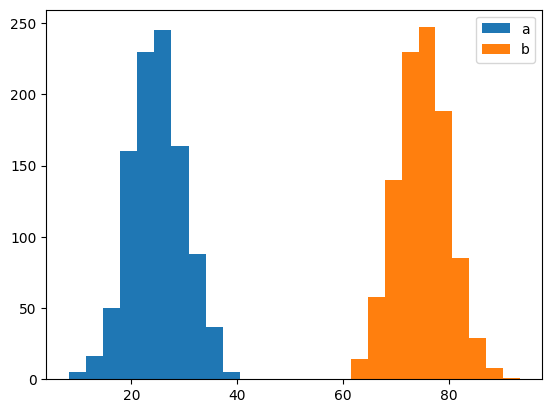

In [13]:
sigma = 5
mean_diff = 50
params = [sigma, mean_diff]
a = np.random.normal(25, sigma, size = (1000, 1))
np.random.seed = 2
b = np.random.normal(25+mean_diff, sigma, size = (1000, 1))
plt.hist(a)
plt.hist(b)
plt.legend(("a", "b"))

In [14]:
a_vec = np.repeat("a", len(a))
dset_a = np.column_stack((a_vec, a))
dset_a = pd.DataFrame(data = dset_a, columns =( "group", "value"))

b_vec = np.repeat("b", len(b))
dset_b = np.column_stack((b_vec, b))
dset_b = pd.DataFrame(dset_b , columns =( "group", "value"))

dset = pd.concat([dset_a, dset_b], axis = 0)
dset['value'] = pd.to_numeric(dset['value'])
dset

,group,value
0,a,24.289055
1,a,31.081723
2,a,29.377674
3,a,28.597062
4,a,20.267414
...,...,...
995,b,74.445203
996,b,72.432732
997,b,79.682213
998,b,78.021517


In [158]:
#divide into training and test sets
dset['group'] = dset['group'].replace(['a', 'b'], [0,1]).infer_objects(copy=False)
x = dset.drop('group', axis = 1)
y = dset['group']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(x_train)
print(y_train)

         value        var2      var3
483  78.410424  164.387759  2.096504
146  26.419498   68.402189  2.589080
123  80.544054  170.914293  2.121998
879  27.943028   62.927183  2.251981
370  27.971194   66.681084  2.383920
..         ...         ...       ...
340  23.275013   55.014764  2.363683
365  81.118837  174.085104  2.146050
55   75.144812  158.778327  2.112965
254  33.536856   82.621450  2.463602
923  33.110964   80.719439  2.437846

[1600 rows x 3 columns]
483    1
146    0
123    1
879    0
370    0
      ..
340    0
365    1
55     1
254    0
923    0
Name: group, Length: 1600, dtype: int64


Building a simple model.

In [168]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
    optimizer = 'adam',
    metrics = ['accuracy', 'precision', 'AUC']
)

Training the model.

In [160]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.5788 - accuracy: 0.5666 - loss: 2.0319 - precision: 0.5541
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7956 - accuracy: 0.7519 - loss: 0.6171 - precision: 0.7125
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9400 - accuracy: 0.9070 - loss: 0.2697 - precision: 0.8812
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9836 - accuracy: 0.9679 - loss: 0.1358 - precision: 0.9664
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9926 - accuracy: 0.9911 - loss: 0.0870 - precision: 0.9936


Testing the model.

In [161]:
trial1_eval = model.evaluate(x_test,  y_test, verbose=2)
trial1_eval = trial1_eval + params
trial1_eval = pd.Series(trial1_eval, index = ['loss', 'accuracy', 'precision', 'AUC', 'sigma', 'mean_diff'])
print(trial1_eval)

13/13 - 1s - 53ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 0.0451 - precision: 1.0000
loss          0.045122
accuracy      1.000000
precision     1.000000
AUC           1.000000
sigma         5.000000
mean_diff    50.000000
dtype: float64


Creating a function to do all these steps and return evaluation information:

In [191]:
def model_train_test(mean_1, sigma, mean_diff, size, model, epochs, show, seed):
    params = [sigma, mean_diff]
    half_size = int(size/2)
    np.random.seed = seed
    a = np.random.normal(25, sigma, size = (half_size, 1))
    b = np.random.normal(mean_1+mean_diff, sigma, size = (half_size, 1))
    if (show == True):
        plt.hist(a)
        plt.hist(b)
        plt.title("n = " +str(size) + ", sigma = " + str(sigma) + ", mean difference = " +str(mean_diff))
        plt.legend(("a", "b"))
        plt.show()
    
    a_vec = np.repeat("a", len(a))
    dset_a = np.column_stack((a_vec, a))
    dset_a = pd.DataFrame(data = dset_a, columns =( "group", "value"))
    
    b_vec = np.repeat("b", len(b))
    dset_b = np.column_stack((b_vec, b))
    dset_b = pd.DataFrame(dset_b , columns =( "group", "value"))
    
    dset = pd.concat([dset_a, dset_b], axis = 0)
    dset['value'] = pd.to_numeric(dset['value'])
    #shuffle data and divide into training and test
    dset['group'] = dset['group'].replace(['a', 'b'], [0,1]).infer_objects(copy = False)
    dset = dset.sample(frac = 1)
    frac = int(0.7*len(dset))
    dset_train = dset[:frac]
    dset_test = dset[frac:]
    #make data into tensors
    x_train = tf.constant((dset_train['value']), shape = (len(dset_train),1))
    y_train = tf.constant((dset_train['group']), shape = (len(dset_train), 1))
    
    x_test = tf.constant((dset_test['value']), shape = (len(dset_test), 1))
    y_test = tf.constant((dset_test['group']), shape = (len(dset_test), 1))
    #train model
    if (show == False):
        model.fit(x_train, y_train, epochs=5, batch_size = 32, verbose = 0)
    else:
        model.fit(x_train, y_train, epochs = 5, batch_size = 32)
    #test model
    evals = model.evaluate(x_test,  y_test, verbose=2)
    evals = evals + params
    evals = pd.Series(evals, index = ['loss', 'accuracy', 'precision', 'AUC', 'sigma', 'mean_diff'])
    return(evals)

I want to investigate how changing the mean and standard deviations of the distributions changes the model's ability to classify it. To do this, I will keep one of those parameters constant while varying the other and observing the accuracy of the model.

First, keeping the mean difference at 25 and varying the standard deviation between 0 and 50.

In [193]:
sigmas = np.arange(0, 55, 5)
mean_diff = 25
mean_1 = 25
size = 20000
epochs = 5
sigmas_test = []

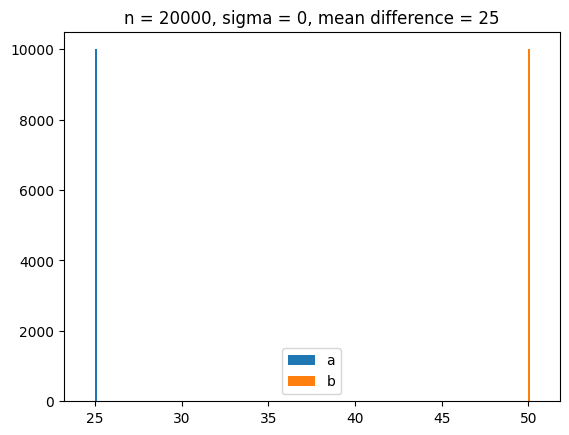

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 1.0000 - accuracy: 0.9007 - loss: 0.2153 - precision: 0.9567
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 0.0051 - precision: 1.0000
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 0.0024 - precision: 1.0000
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 0.0013 - precision: 1.0000
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 0.0011 - precision: 1.0000
188/188 - 0s - 2ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 5.8730e-05 - precision: 1.0000


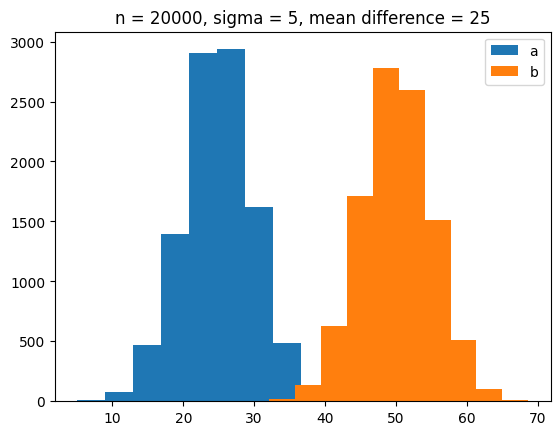

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9926 - accuracy: 0.9901 - loss: 0.0287 - precision: 0.9913
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9951 - accuracy: 0.9932 - loss: 0.0224 - precision: 0.9930
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9945 - accuracy: 0.9934 - loss: 0.0177 - precision: 0.9949
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC: 0.9942 - accuracy: 0.9917 - loss: 0.0200 - precision: 0.9929
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9942 - accuracy: 0.9925 - loss: 0.0224 - precision: 0.9925
188/188 - 0s - 2ms/step - AUC: 0.9956 - accuracy: 0.9935 - loss: 0.0170 - precision: 0.9944


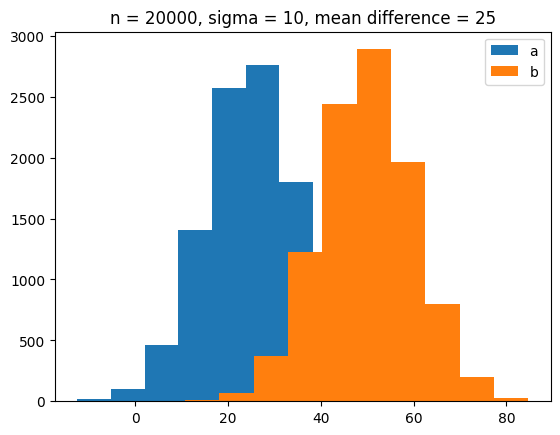

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9206 - accuracy: 0.8880 - loss: 0.2910 - precision: 0.9228
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9113 - accuracy: 0.8822 - loss: 0.2726 - precision: 0.9180
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9140 - accuracy: 0.8866 - loss: 0.2587 - precision: 0.9237
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9189 - accuracy: 0.8858 - loss: 0.2606 - precision: 0.9154
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9121 - accuracy: 0.8888 - loss: 0.2626 - precision: 0.9253
188/188 - 0s - 2ms/step - AUC: 0.9170 - accuracy: 0.8835 - loss: 0.2520 - precision: 0.9298


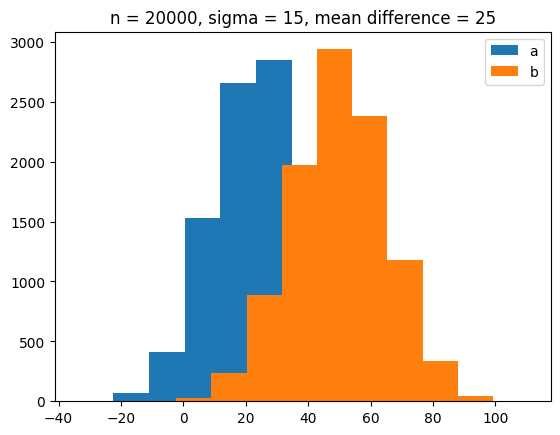

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8334 - accuracy: 0.7810 - loss: 0.4524 - precision: 0.8651
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8317 - accuracy: 0.7800 - loss: 0.4435 - precision: 0.8494
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8296 - accuracy: 0.7860 - loss: 0.4406 - precision: 0.8493
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8347 - accuracy: 0.7911 - loss: 0.4349 - precision: 0.8473
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.8289 - accuracy: 0.7887 - loss: 0.4373 - precision: 0.8469
188/188 - 1s - 3ms/step - AUC: 0.8339 - accuracy: 0.7872 - loss: 0.4350 - precision: 0.8401


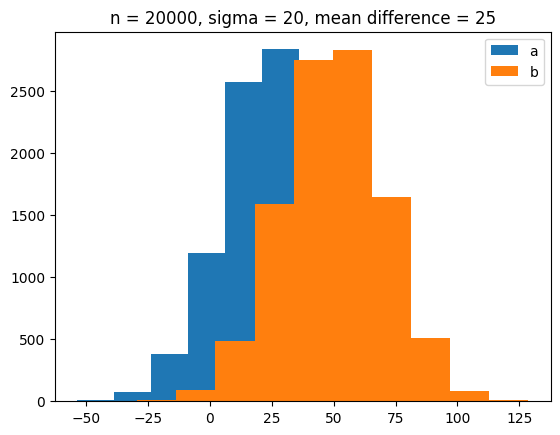

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7628 - accuracy: 0.7102 - loss: 0.5467 - precision: 0.8124
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7597 - accuracy: 0.7056 - loss: 0.5379 - precision: 0.7983
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7671 - accuracy: 0.7132 - loss: 0.5349 - precision: 0.8151
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7665 - accuracy: 0.7131 - loss: 0.5336 - precision: 0.8023
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7659 - accuracy: 0.7096 - loss: 0.5378 - precision: 0.8084
188/188 - 1s - 3ms/step - AUC: 0.7651 - accuracy: 0.7225 - loss: 0.5409 - precision: 0.7699


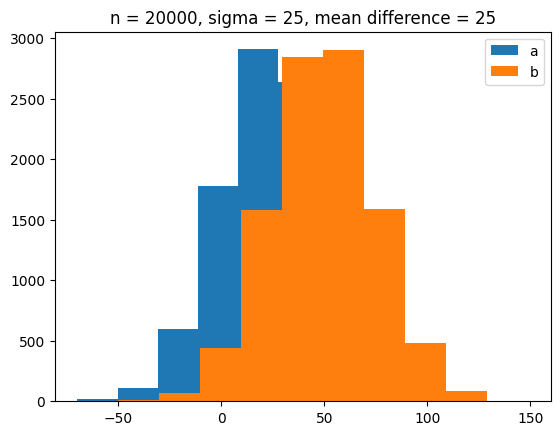

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7242 - accuracy: 0.6689 - loss: 0.5853 - precision: 0.7602
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7199 - accuracy: 0.6554 - loss: 0.5887 - precision: 0.7652
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7271 - accuracy: 0.6686 - loss: 0.5818 - precision: 0.7663
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7239 - accuracy: 0.6660 - loss: 0.5886 - precision: 0.7601
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.7231 - accuracy: 0.6590 - loss: 0.5879 - precision: 0.7537
188/188 - 0s - 2ms/step - AUC: 0.7146 - accuracy: 0.6677 - loss: 0.5865 - precision: 0.7488


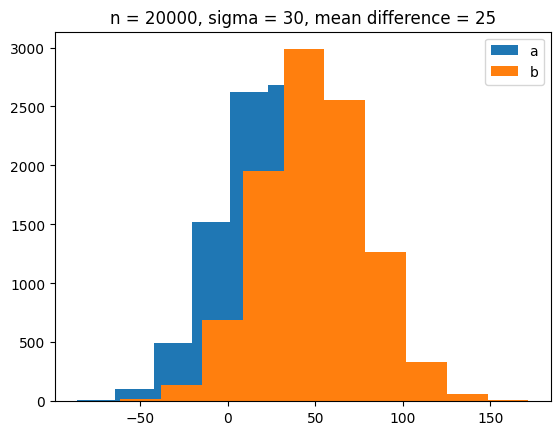

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6836 - accuracy: 0.6248 - loss: 0.6170 - precision: 0.7313
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6821 - accuracy: 0.6192 - loss: 0.6187 - precision: 0.7335
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6803 - accuracy: 0.6142 - loss: 0.6209 - precision: 0.7219
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6884 - accuracy: 0.6284 - loss: 0.6177 - precision: 0.7301
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6818 - accuracy: 0.6176 - loss: 0.6228 - precision: 0.7344
188/188 - 0s - 2ms/step - AUC: 0.6877 - accuracy: 0.6133 - loss: 0.6245 - precision: 0.7429


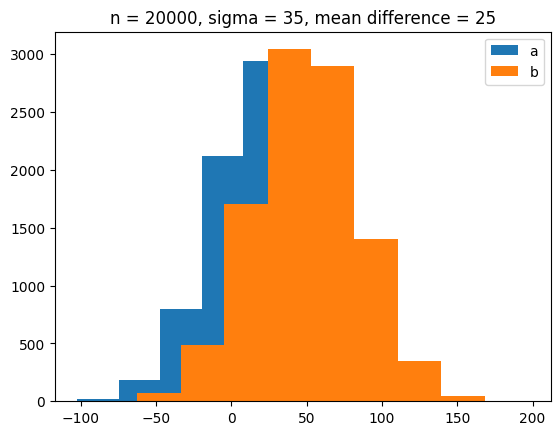

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.6728 - accuracy: 0.6172 - loss: 0.6322 - precision: 0.7300
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6679 - accuracy: 0.6113 - loss: 0.6309 - precision: 0.7338
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6603 - accuracy: 0.5941 - loss: 0.6387 - precision: 0.7089
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.6672 - accuracy: 0.6103 - loss: 0.6369 - precision: 0.7197
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6731 - accuracy: 0.6062 - loss: 0.6344 - precision: 0.7290
188/188 - 0s - 2ms/step - AUC: 0.6594 - accuracy: 0.5952 - loss: 0.6351 - precision: 0.7335


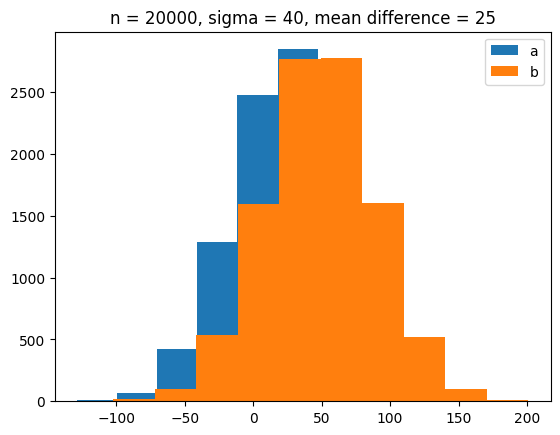

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6387 - accuracy: 0.5815 - loss: 0.6539 - precision: 0.7001
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6424 - accuracy: 0.5865 - loss: 0.6506 - precision: 0.7151
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.6396 - accuracy: 0.5817 - loss: 0.6516 - precision: 0.6973
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6402 - accuracy: 0.5755 - loss: 0.6534 - precision: 0.6983
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6415 - accuracy: 0.5759 - loss: 0.6535 - precision: 0.7053
188/188 - 0s - 2ms/step - AUC: 0.6441 - accuracy: 0.5820 - loss: 0.6493 - precision: 0.6974


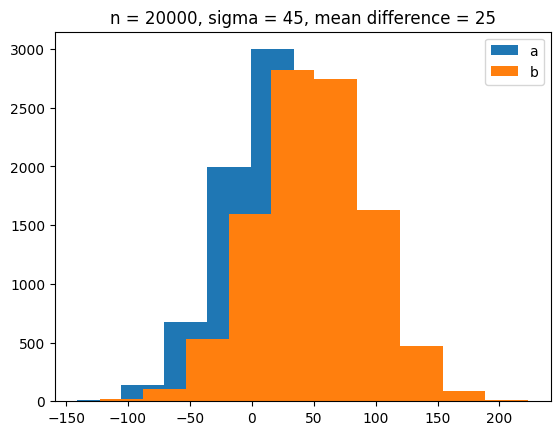

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6294 - accuracy: 0.5584 - loss: 0.6599 - precision: 0.6677
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6285 - accuracy: 0.5652 - loss: 0.6635 - precision: 0.6884
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6348 - accuracy: 0.5599 - loss: 0.6569 - precision: 0.6984
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6428 - accuracy: 0.5772 - loss: 0.6531 - precision: 0.7137
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6334 - accuracy: 0.5651 - loss: 0.6580 - precision: 0.6981
188/188 - 0s - 2ms/step - AUC: 0.6331 - accuracy: 0.5813 - loss: 0.6550 - precision: 0.6944


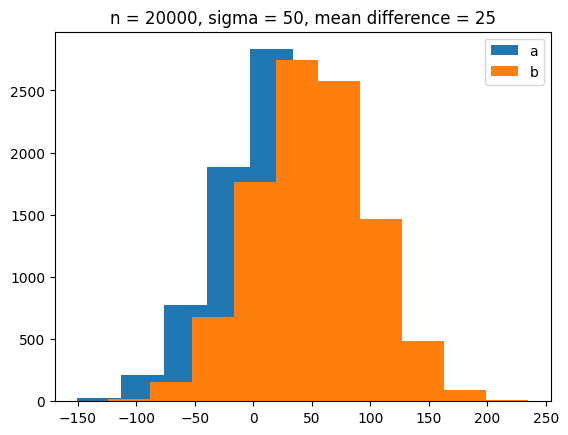

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6163 - accuracy: 0.5443 - loss: 0.6668 - precision: 0.6609
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6196 - accuracy: 0.5479 - loss: 0.6651 - precision: 0.6767
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6169 - accuracy: 0.5468 - loss: 0.6654 - precision: 0.6785
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6246 - accuracy: 0.5542 - loss: 0.6632 - precision: 0.6627
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6156 - accuracy: 0.5444 - loss: 0.6655 - precision: 0.6697
188/188 - 0s - 2ms/step - AUC: 0.6304 - accuracy: 0.5325 - loss: 0.6589 - precision: 0.7477


In [194]:
for i in sigmas:
    out = model_train_test(mean_1, i, mean_diff, size, model, epochs, True, 1)
    sigmas_test.append(out)

In [195]:
sigmas_test = pd.DataFrame(sigmas_test)
sigmas_test

,loss,accuracy,precision,AUC,sigma,mean_diff
0,0.000059,1.000000,1.000000,1.000000,0.0,25.0
1,0.017001,0.993500,0.994382,0.995648,5.0,25.0
2,0.251951,0.883500,0.929785,0.916987,10.0,25.0
3,0.434957,0.787167,0.840144,0.833919,15.0,25.0
4,0.540855,0.722500,0.769930,0.765149,20.0,25.0
5,0.586544,0.667667,0.748832,0.714629,25.0,25.0
6,0.624456,0.613333,0.742877,0.687661,30.0,25.0
7,0.635057,0.595167,0.733537,0.659390,35.0,25.0
8,0.649257,0.582000,0.697389,0.644108,40.0,25.0
9,0.655005,0.581333,0.694400,0.633115,45.0,25.0


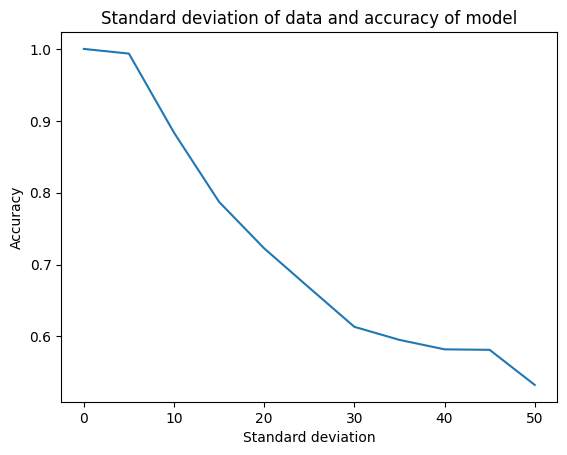

In [196]:
plt.plot(sigmas_test.sigma, sigmas_test.accuracy)
plt.title("Standard deviation of data and accuracy of model")
plt.xlabel("Standard deviation")
plt.ylabel("Accuracy")
plt.show()

In [198]:
#with a new random seed
test = []
for i in sigmas:
    out = model_train_test(mean_1, i, mean_diff, size, model, epochs, False, 27)
    test.append(out)

188/188 - 0s - 2ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 2.4874e-06 - precision: 1.0000
188/188 - 0s - 2ms/step - AUC: 0.9953 - accuracy: 0.9947 - loss: 0.0169 - precision: 0.9970
188/188 - 0s - 2ms/step - AUC: 0.9033 - accuracy: 0.8823 - loss: 0.2732 - precision: 0.9309
188/188 - 0s - 2ms/step - AUC: 0.8230 - accuracy: 0.7808 - loss: 0.4417 - precision: 0.8452
188/188 - 0s - 2ms/step - AUC: 0.7726 - accuracy: 0.7237 - loss: 0.5271 - precision: 0.8056
188/188 - 0s - 2ms/step - AUC: 0.7210 - accuracy: 0.6653 - loss: 0.5845 - precision: 0.7558
188/188 - 0s - 2ms/step - AUC: 0.7006 - accuracy: 0.6432 - loss: 0.6126 - precision: 0.7386
188/188 - 0s - 2ms/step - AUC: 0.6626 - accuracy: 0.5882 - loss: 0.6370 - precision: 0.7466
188/188 - 0s - 2ms/step - AUC: 0.6341 - accuracy: 0.5740 - loss: 0.6530 - precision: 0.6918
188/188 - 1s - 3ms/step - AUC: 0.6467 - accuracy: 0.5675 - loss: 0.6485 - precision: 0.7152
188/188 - 0s - 2ms/step - AUC: 0.6282 - accuracy: 0.5498 - loss: 0.6570 - pr

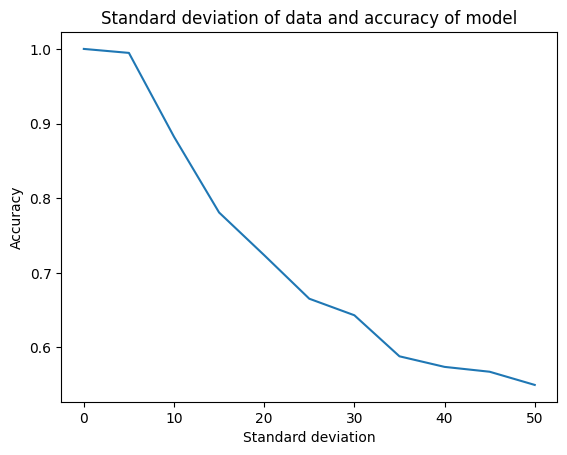

In [199]:
test = pd.DataFrame(test)
plt.plot(test.sigma, test.accuracy)
plt.title("Standard deviation of data and accuracy of model")
plt.xlabel("Standard deviation")
plt.ylabel("Accuracy")
plt.show()

These trials show that as the standard deviation decreases the accuracy decreases in a logarithmic-like curve. Two different randomly generated trials are shown, and this trend of a roughly logarithmic decrease to an accuracy of around 50% has been consistent through other trials.

To test the effect of mean difference, the standard deviation will be kept at 15, and the difference between the means of the two distributions will be varied.

In [200]:
sigmas = 15
mean_diff = np.arange(0,100,10)
mean_1 = 25
size = 20000
epochs = 5
meandiff_test = []

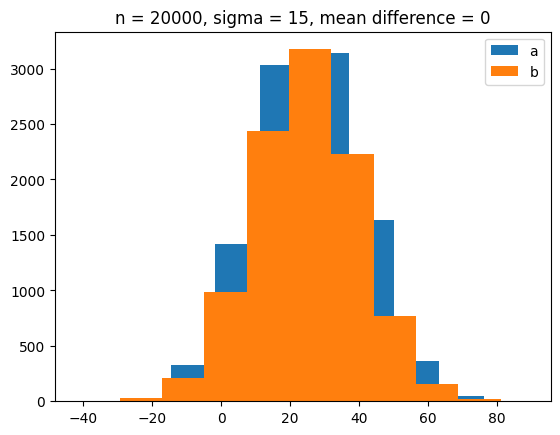

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.4987 - accuracy: 0.5018 - loss: 0.6968 - precision: 0.0000e+00
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.4937 - accuracy: 0.4962 - loss: 0.6954 - precision: 0.0000e+00
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.5020 - accuracy: 0.5040 - loss: 0.6943 - precision: 0.0000e+00
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.4899 - accuracy: 0.5016 - loss: 0.6942 - precision: 0.0000e+00
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.5016 - accuracy: 0.5039 - loss: 0.6937 - precision: 0.0000e+00
188/188 - 1s - 3ms/step - AUC: 0.5034 - accuracy: 0.4955 - loss: 0.6931 - precision: 0.0000e+00


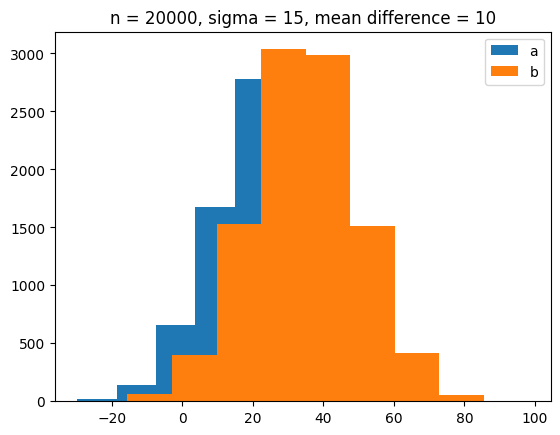

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6088 - accuracy: 0.5266 - loss: 0.6698 - precision: 0.5838
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6566 - accuracy: 0.5921 - loss: 0.6445 - precision: 0.7028
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.6407 - accuracy: 0.5769 - loss: 0.6506 - precision: 0.6947
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6568 - accuracy: 0.5892 - loss: 0.6455 - precision: 0.7096
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6609 - accuracy: 0.5910 - loss: 0.6410 - precision: 0.7188
188/188 - 1s - 3ms/step - AUC: 0.6660 - accuracy: 0.5877 - loss: 0.6360 - precision: 0.7356


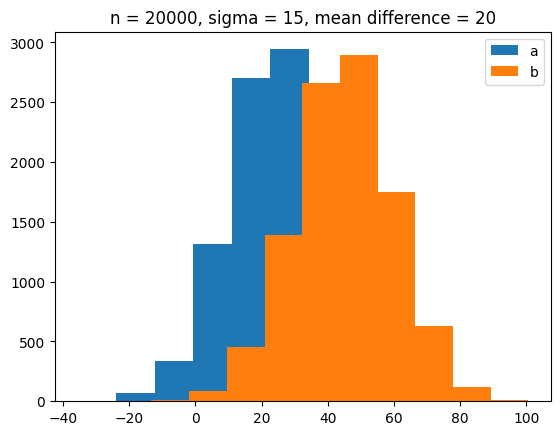

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7902 - accuracy: 0.7352 - loss: 0.5208 - precision: 0.8076
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7808 - accuracy: 0.7321 - loss: 0.5113 - precision: 0.8040
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7838 - accuracy: 0.7379 - loss: 0.5115 - precision: 0.8030
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7814 - accuracy: 0.7362 - loss: 0.5132 - precision: 0.8008
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7878 - accuracy: 0.7414 - loss: 0.5065 - precision: 0.7992
188/188 - 1s - 3ms/step - AUC: 0.7778 - accuracy: 0.7360 - loss: 0.5138 - precision: 0.7969


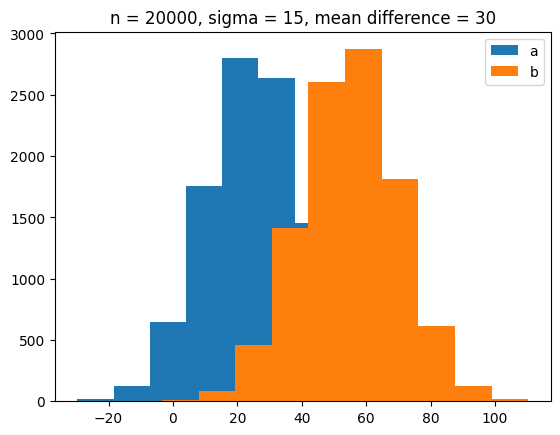

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8708 - accuracy: 0.8351 - loss: 0.3682 - precision: 0.8737
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.8701 - accuracy: 0.8351 - loss: 0.3605 - precision: 0.8821
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8685 - accuracy: 0.8330 - loss: 0.3647 - precision: 0.8814
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8638 - accuracy: 0.8270 - loss: 0.3714 - precision: 0.8787
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8648 - accuracy: 0.8272 - loss: 0.3727 - precision: 0.8735
188/188 - 0s - 3ms/step - AUC: 0.8718 - accuracy: 0.8393 - loss: 0.3668 - precision: 0.8667


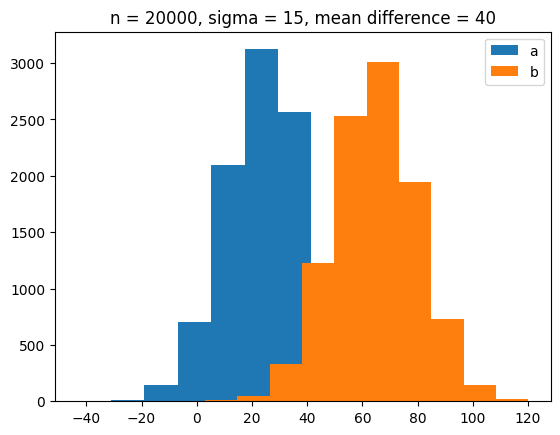

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9203 - accuracy: 0.8945 - loss: 0.2488 - precision: 0.9174
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9245 - accuracy: 0.9033 - loss: 0.2345 - precision: 0.9295
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9229 - accuracy: 0.9027 - loss: 0.2361 - precision: 0.9262
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9230 - accuracy: 0.9021 - loss: 0.2346 - precision: 0.9274
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9221 - accuracy: 0.9027 - loss: 0.2359 - precision: 0.9259
188/188 - 0s - 2ms/step - AUC: 0.9252 - accuracy: 0.9075 - loss: 0.2247 - precision: 0.9245


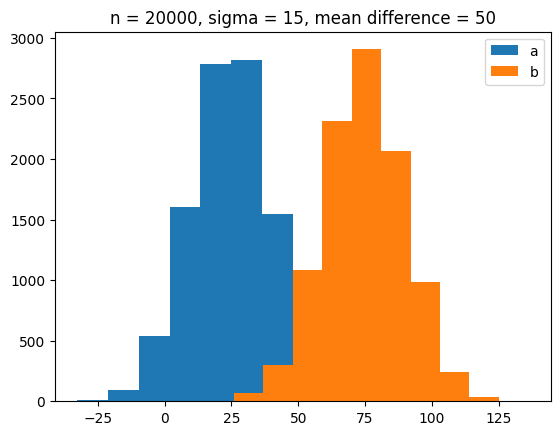

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9624 - accuracy: 0.9519 - loss: 0.1285 - precision: 0.9609
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9624 - accuracy: 0.9526 - loss: 0.1275 - precision: 0.9604
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9620 - accuracy: 0.9520 - loss: 0.1257 - precision: 0.9616
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9595 - accuracy: 0.9495 - loss: 0.1337 - precision: 0.9609
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9614 - accuracy: 0.9504 - loss: 0.1289 - precision: 0.9628
188/188 - 0s - 2ms/step - AUC: 0.9595 - accuracy: 0.9498 - loss: 0.1281 - precision: 0.9498


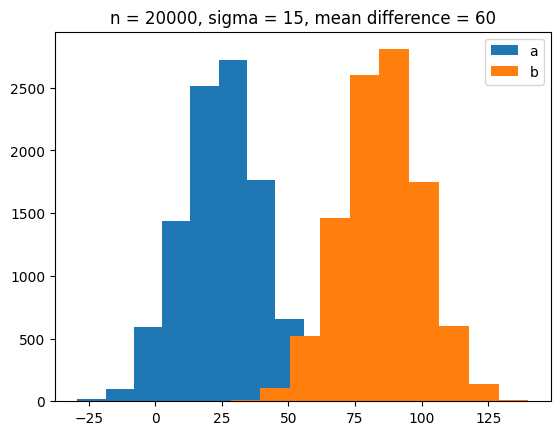

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9828 - accuracy: 0.9745 - loss: 0.0646 - precision: 0.9775
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9829 - accuracy: 0.9778 - loss: 0.0584 - precision: 0.9818
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9816 - accuracy: 0.9755 - loss: 0.0632 - precision: 0.9786
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9817 - accuracy: 0.9774 - loss: 0.0612 - precision: 0.9797
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9816 - accuracy: 0.9763 - loss: 0.0603 - precision: 0.9803
188/188 - 0s - 2ms/step - AUC: 0.9809 - accuracy: 0.9762 - loss: 0.0620 - precision: 0.9787


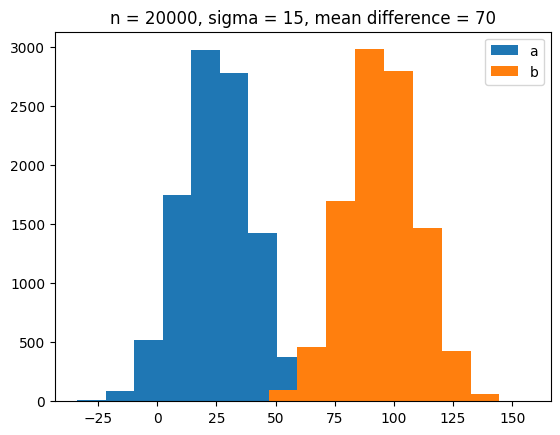

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9912 - accuracy: 0.9897 - loss: 0.0310 - precision: 0.9904
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.9899 - accuracy: 0.9869 - loss: 0.0342 - precision: 0.9903
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9913 - accuracy: 0.9893 - loss: 0.0284 - precision: 0.9926
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9908 - accuracy: 0.9879 - loss: 0.0314 - precision: 0.9916
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9913 - accuracy: 0.9889 - loss: 0.0277 - precision: 0.9909
188/188 - 0s - 2ms/step - AUC: 0.9916 - accuracy: 0.9895 - loss: 0.0298 - precision: 0.9892


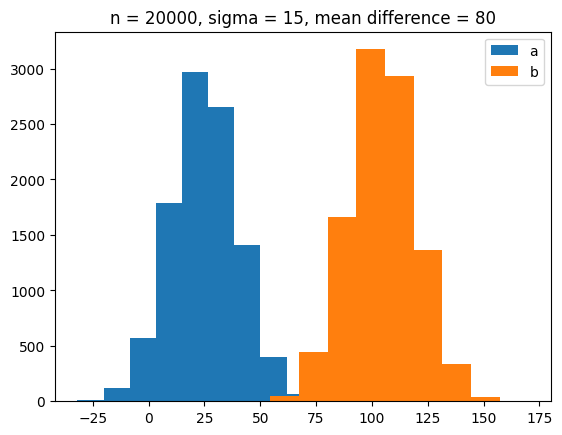

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9970 - accuracy: 0.9959 - loss: 0.0128 - precision: 0.9963
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9966 - accuracy: 0.9954 - loss: 0.0114 - precision: 0.9961
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9962 - accuracy: 0.9955 - loss: 0.0125 - precision: 0.9967
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9966 - accuracy: 0.9962 - loss: 0.0116 - precision: 0.9964
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9967 - accuracy: 0.9952 - loss: 0.0118 - precision: 0.9962
188/188 - 0s - 2ms/step - AUC: 0.9975 - accuracy: 0.9973 - loss: 0.0101 - precision: 0.9980


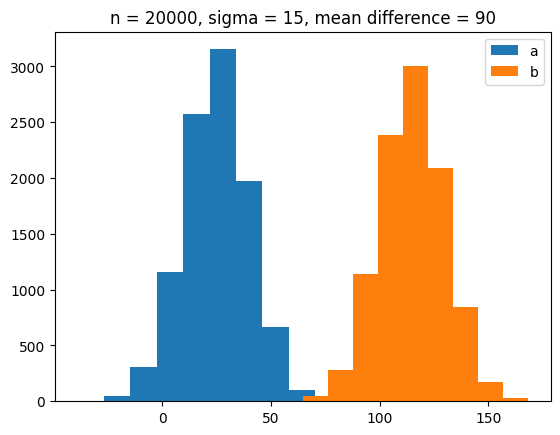

Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9992 - accuracy: 0.9988 - loss: 0.0037 - precision: 0.9996
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9986 - accuracy: 0.9981 - loss: 0.0048 - precision: 0.9987
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9993 - accuracy: 0.9983 - loss: 0.0036 - precision: 0.9984
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9986 - accuracy: 0.9985 - loss: 0.0058 - precision: 0.9994
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9982 - accuracy: 0.9982 - loss: 0.0054 - precision: 0.9989
188/188 - 1s - 3ms/step - AUC: 0.9993 - accuracy: 0.9993 - loss: 0.0030 - precision: 0.9997


In [201]:
for i in mean_diff:
    out = model_train_test(mean_1, sigmas, i, size, model, epochs, True, 5)
    meandiff_test.append(out)

In [203]:
meandiff_test = pd.DataFrame(meandiff_test)
meandiff_test

,loss,accuracy,precision,AUC,sigma,mean_diff
0,0.693052,0.495500,0.000000,0.503416,15.0,0.0
1,0.636025,0.587667,0.735632,0.665977,15.0,10.0
2,0.513792,0.736000,0.796888,0.777847,15.0,20.0
3,0.366770,0.839333,0.866667,0.871842,15.0,30.0
4,0.224730,0.907500,0.924541,0.925163,15.0,40.0
5,0.128096,0.949833,0.949750,0.959477,15.0,50.0
6,0.061990,0.976167,0.978688,0.980927,15.0,60.0
7,0.029832,0.989500,0.989215,0.991608,15.0,70.0
8,0.010141,0.997333,0.997999,0.997497,15.0,80.0
9,0.003011,0.999333,0.999668,0.999334,15.0,90.0


Text(0, 0.5, 'Accuracy')

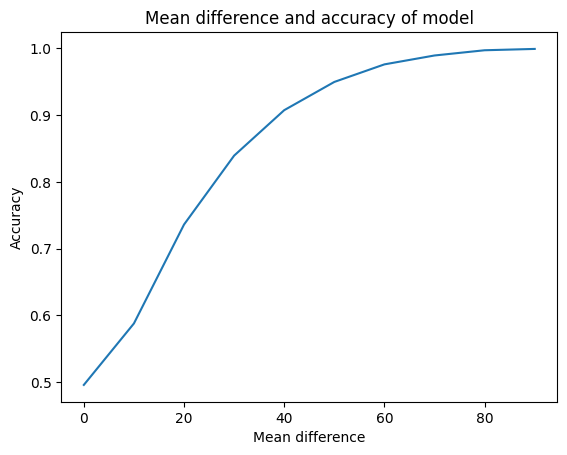

In [204]:
plt.plot(meandiff_test.mean_diff, meandiff_test.accuracy)
plt.title("Mean difference and accuracy of model")
plt.xlabel("Mean difference")
plt.ylabel("Accuracy")

In [206]:
#with a new random seed
test = []
for i in mean_diff:
    out = model_train_test(mean_1, sigmas, i, size, model, epochs, False, 13)
    test.append(out)

188/188 - 0s - 2ms/step - AUC: 0.4953 - accuracy: 0.5042 - loss: 0.6935 - precision: 1.0000
188/188 - 1s - 3ms/step - AUC: 0.6792 - accuracy: 0.6142 - loss: 0.6308 - precision: 0.7421
188/188 - 1s - 3ms/step - AUC: 0.7892 - accuracy: 0.7357 - loss: 0.5129 - precision: 0.8043
188/188 - 1s - 3ms/step - AUC: 0.8778 - accuracy: 0.8457 - loss: 0.3544 - precision: 0.8844
188/188 - 1s - 7ms/step - AUC: 0.9236 - accuracy: 0.8998 - loss: 0.2275 - precision: 0.9276
188/188 - 0s - 2ms/step - AUC: 0.9599 - accuracy: 0.9487 - loss: 0.1309 - precision: 0.9668
188/188 - 1s - 4ms/step - AUC: 0.9844 - accuracy: 0.9775 - loss: 0.0614 - precision: 0.9818
188/188 - 1s - 3ms/step - AUC: 0.9908 - accuracy: 0.9873 - loss: 0.0292 - precision: 0.9956
188/188 - 0s - 2ms/step - AUC: 0.9963 - accuracy: 0.9950 - loss: 0.0104 - precision: 0.9960
188/188 - 0s - 3ms/step - AUC: 0.9983 - accuracy: 0.9980 - loss: 0.0036 - precision: 0.9997


Text(0, 0.5, 'Accuracy')

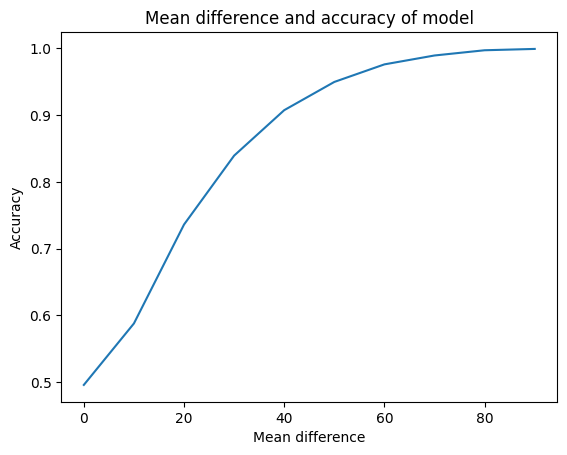

In [207]:
test = pd.DataFrame(test)
plt.plot(meandiff_test.mean_diff, meandiff_test.accuracy)
plt.title("Mean difference and accuracy of model")
plt.xlabel("Mean difference")
plt.ylabel("Accuracy")

These trials show that as the mean difference increases from 0 to 100, the accuracy increases from 0.5 to 1 in an exponential curve. Two trials with different randomly generated datasets are shown here, and this trend was consistent with all randomly generated data tried.

The relationships between standard deviation and mean difference and accuracy of the classification model appear to be straightforward with the data used. However, it is a very simple dataset and much real world data is more complicated and less clean. How would adding more variables affect the models effectiveness?

In [238]:
sigma = 10
mean_diff = 25
params = [sigma, mean_diff]
a = np.random.normal(25, sigma, size = (1000, 1))
np.random.seed = 2
b = np.random.normal(25+mean_diff, sigma, size = (1000, 1))

a_vec = np.repeat("a", len(a))
dset_a = np.column_stack((a_vec, a))
dset_a = pd.DataFrame(data = dset_a, columns =( "group", "value"))

b_vec = np.repeat("b", len(b))
dset_b = np.column_stack((b_vec, b))
dset_b = pd.DataFrame(dset_b , columns =( "group", "value"))

dset = pd.concat([dset_a, dset_b], axis = 0)
dset['value'] = pd.to_numeric(dset['value'])
dset

#adding another variable based on the first variable with random noise added.
noise = np.random.normal(0,sigma,len(dset.group))
var2 = pd.Series(dset.value*2+10 + noise)
dset['var2'] = var2
dset

,group,value,var2
0,a,35.124632,81.240623
1,a,31.071145,69.595825
2,a,30.327948,59.597681
3,a,20.340645,46.266062
4,a,29.110732,79.739957
...,...,...,...
995,b,49.967467,103.178982
996,b,43.198075,87.892156
997,b,42.263962,86.426083
998,b,73.065179,157.582498


Text(0, 0.5, 'var2')

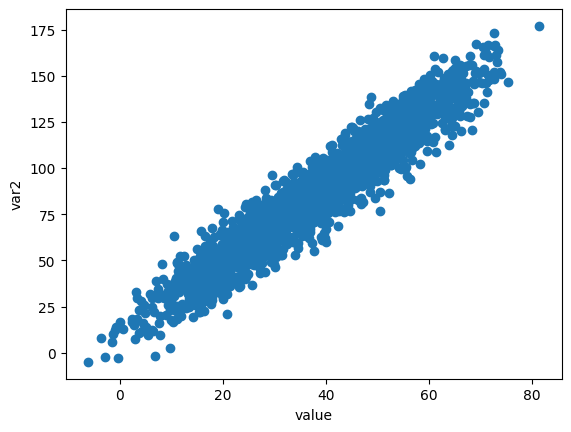

In [239]:
plt.scatter(dset.value, dset.var2)
plt.xlabel("value")
plt.ylabel("var2")

In [240]:
from scipy.stats import pearsonr
pearsonr(dset.value, dset.var2)

PearsonRResult(statistic=0.9565150548542225, pvalue=0.0)

This scatterplot shows the relationship between the two variables. Variable 2 being based on variable one's value is meant to emulate variables in real data that are strongly correlated, but with some noise added. The level of noise added will be investigated later.

<Axes: ylabel='Frequency'>

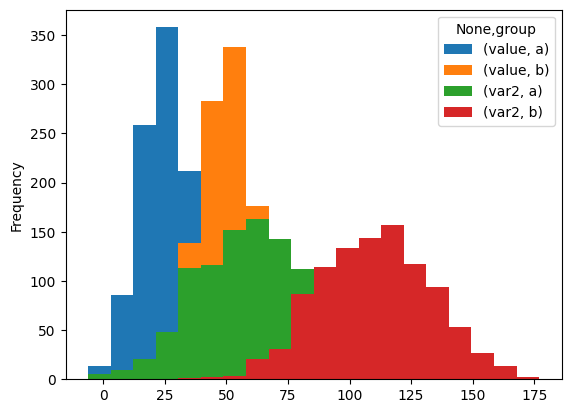

In [241]:
dset.pivot(columns='group', values=['value', 'var2']).plot.hist(bins = 20)

In [242]:
#make data into tensors
dset['group'] = dset['group'].replace(['a', 'b'], [0,1]).infer_objects(copy = False)
x = dset.drop('group', axis = 1)
y = dset['group']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


print(x_train.shape)
print(y_train.shape)

(1600, 2)
(1600,)


In [243]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
    optimizer = 'adam',
    metrics = ['accuracy', 'precision', 'AUC']
)

In [244]:
model.fit(x_train, y_train, epochs=5, batch_size = 32)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.5423 - accuracy: 0.5338 - loss: 1.6940 - precision: 0.5242
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.6724 - accuracy: 0.6393 - loss: 0.7759 - precision: 0.6343
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7904 - accuracy: 0.7536 - loss: 0.5353 - precision: 0.7461
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7858 - accuracy: 0.7403 - loss: 0.5310 - precision: 0.7735
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8451 - accuracy: 0.7813 - loss: 0.5037 - precision: 0.7714


In [245]:
trial_2groups_eval = model.evaluate(x_test,  y_test, verbose=2)
trial_2groups_eval = trial_2groups_eval + params
trial_2groups_eval = pd.Series(trial_2groups_eval, index = ['loss', 'accuracy', 'precision', 'AUC', 'sigma', 'mean_diff'])
print(trial_2groups_eval)
print(sigmas_test.loc[2,:])

13/13 - 1s - 66ms/step - AUC: 0.8571 - accuracy: 0.7900 - loss: 0.4768 - precision: 0.8824
loss          0.476835
accuracy      0.790000
precision     0.882353
AUC           0.857062
sigma        10.000000
mean_diff    25.000000
dtype: float64
loss          0.251951
accuracy      0.883500
precision     0.929785
AUC           0.916987
sigma        10.000000
mean_diff    25.000000
Name: 2, dtype: float64


The addition of a second variable decreased the accuracy of a model with the same standard deviation and mean difference of the shared variable. This is likely because there is added noise from the second variable. As is visible in the histogram above, the distributions of the two categories of variable 2 overlap, which means it is more difficult for the neural net to determine which category a data point should be sorted into. How do the respective levels of noise in variable one and variable two's generation respectively affect the accuracy?

In [252]:
#make a function to create dataset, train, and test model
def twovar_model(sigma1, sigma2, show, seed):
    mean_diff = 50
    a = np.random.normal(25, sigma1, size = (1000, 1))
    np.random.seed = seed
    b = np.random.normal(25+mean_diff, sigma1, size = (1000, 1))
    
    a_vec = np.repeat("a", len(a))
    dset_a = np.column_stack((a_vec, a))
    dset_a = pd.DataFrame(data = dset_a, columns =( "group", "value"))
    
    b_vec = np.repeat("b", len(b))
    dset_b = np.column_stack((b_vec, b))
    dset_b = pd.DataFrame(dset_b , columns =( "group", "value"))
    
    dset = pd.concat([dset_a, dset_b], axis = 0)
    dset['value'] = pd.to_numeric(dset['value'])
    dset
    
    noise = np.random.normal(0,sigma2,len(dset.group))
    var2 = pd.Series(dset.value*2+10 + noise)
    dset['var2'] = var2

    corr = pearsonr(dset.value, dset.var2)

    if (show == True):
        plt.scatter(dset.value, dset.var2)
        plt.xlabel("value")
        plt.ylabel("var2")
        plt.show()

    #make data into tensors
    dset['group'] = dset['group'].replace(['a', 'b'], [0,1]).infer_objects(copy=False)
    x = dset.drop('group', axis = 1)
    y = dset['group']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    if (show == False):
        model.fit(x_train, y_train, epochs=5, verbose = 0, batch_size = 32)
    else:
        model.fit(x_train, y_train, epochs = 5, batch_size = 32)

    params = [sigma1, sigma2, corr]

    out = model.evaluate(x_test,  y_test, verbose=2)
    out = out + params
    out = pd.Series(out, index = ['loss', 'accuracy', 'precision', 'AUC', 'sigma_var1', 'sigma_var2', 'corr'])
    return(out)

Start by keeping standard deviation of noise added to second variable constant at 10, and varying the standard deviation of the first variable. This will also add noise to the second variable, but will not add noise to the relationship between variable 1 and variable 2.

A standard deviation of 10 had an accuracy around .95 (shown above), so that will be the value at which the noise for variable two will be held constant.

In [253]:
sigma2 = 10
sigma1 = np.arange(0,55,5)
twovar_test = []

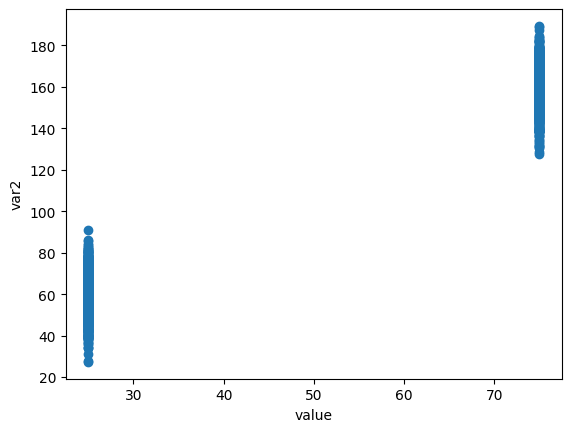

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9915 - accuracy: 0.9605 - loss: 0.3649 - precision: 1.0000
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9987 - accuracy: 0.9985 - loss: 0.0869 - precision: 1.0000
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 1.0000 - accuracy: 0.9999 - loss: 0.0318 - precision: 1.0000
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 1.0000 - accuracy: 0.9992 - loss: 0.0189 - precision: 1.0000
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 0.0105 - precision: 1.0000
13/13 - 0s - 6ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 0.0042 - precision: 1.0000


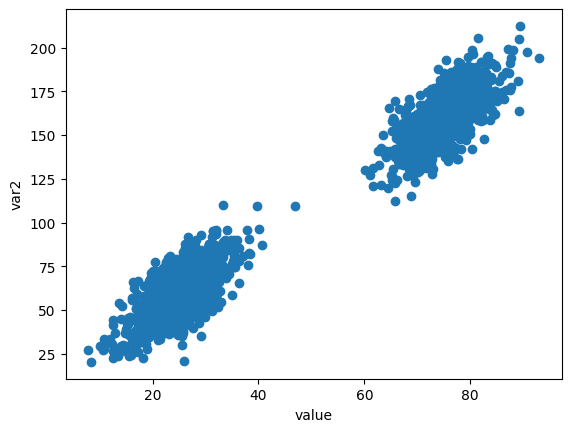

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 0.0165 - precision: 1.0000
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9996 - accuracy: 0.9989 - loss: 0.0138 - precision: 1.0000
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 1.0000 - accuracy: 0.9999 - loss: 0.0094 - precision: 1.0000
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9982 - accuracy: 0.9968 - loss: 0.0171 - precision: 0.9973
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9990 - accuracy: 0.9990 - loss: 0.0093 - precision: 1.0000
13/13 - 0s - 6ms/step - AUC: 1.0000 - accuracy: 0.9975 - loss: 0.0050 - precision: 0.9950


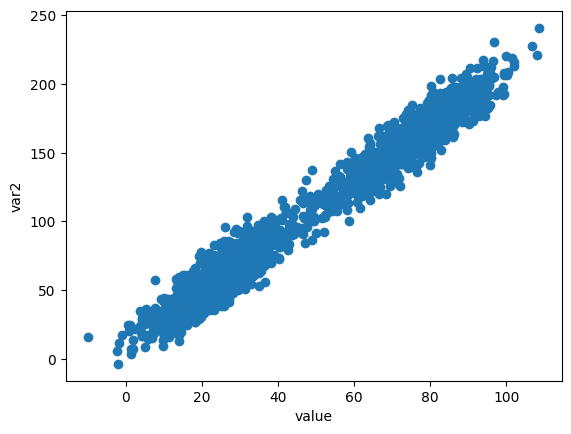

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9867 - accuracy: 0.9828 - loss: 0.0481 - precision: 0.9841
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9902 - accuracy: 0.9788 - loss: 0.0448 - precision: 0.9833
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9924 - accuracy: 0.9903 - loss: 0.0393 - precision: 0.9884
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9929 - accuracy: 0.9904 - loss: 0.0393 - precision: 0.9884
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9762 - accuracy: 0.9696 - loss: 0.0706 - precision: 0.9775
13/13 - 0s - 5ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 0.0119 - precision: 1.0000


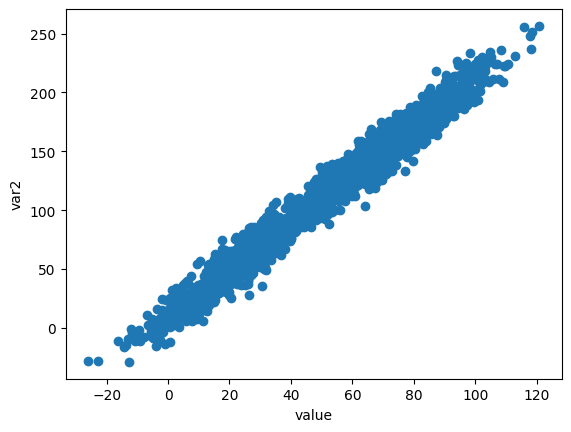

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9609 - accuracy: 0.9492 - loss: 0.1371 - precision: 0.9652
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9612 - accuracy: 0.9363 - loss: 0.1552 - precision: 0.9599
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9569 - accuracy: 0.9430 - loss: 0.1469 - precision: 0.9423
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9427 - accuracy: 0.9185 - loss: 0.1741 - precision: 0.9444
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9568 - accuracy: 0.9392 - loss: 0.1417 - precision: 0.9362
13/13 - 0s - 8ms/step - AUC: 0.9767 - accuracy: 0.9675 - loss: 0.1128 - precision: 0.9517


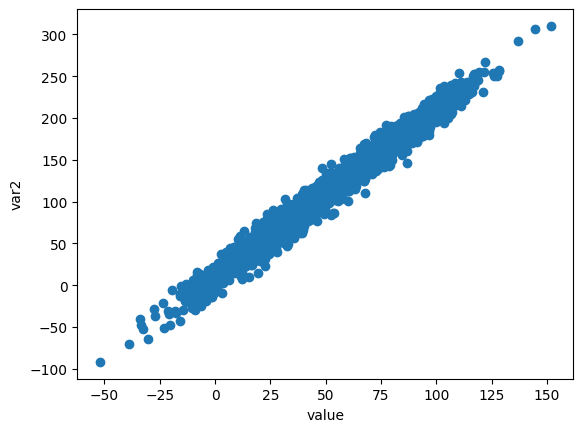

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9155 - accuracy: 0.8911 - loss: 0.2643 - precision: 0.9120
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8970 - accuracy: 0.8614 - loss: 0.3274 - precision: 0.8857
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8987 - accuracy: 0.8765 - loss: 0.2831 - precision: 0.9136
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9106 - accuracy: 0.8719 - loss: 0.2864 - precision: 0.9028
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9058 - accuracy: 0.8687 - loss: 0.2867 - precision: 0.8831
13/13 - 0s - 6ms/step - AUC: 0.9343 - accuracy: 0.8975 - loss: 0.2841 - precision: 0.9005


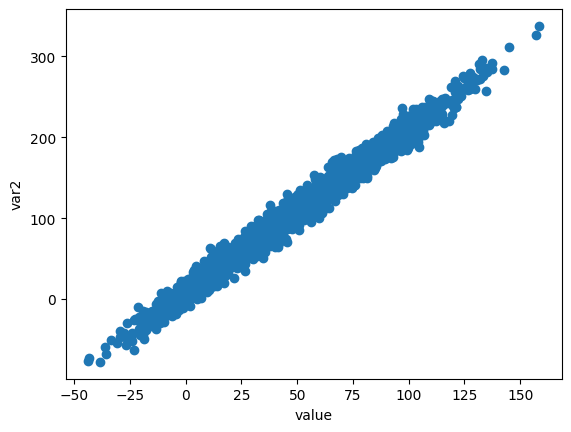

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8620 - accuracy: 0.8229 - loss: 0.4094 - precision: 0.8850
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8652 - accuracy: 0.8241 - loss: 0.3709 - precision: 0.8391
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8556 - accuracy: 0.8056 - loss: 0.3936 - precision: 0.8547
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8740 - accuracy: 0.8367 - loss: 0.3653 - precision: 0.8633
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8633 - accuracy: 0.8185 - loss: 0.3895 - precision: 0.8675
13/13 - 0s - 6ms/step - AUC: 0.8636 - accuracy: 0.8150 - loss: 0.3712 - precision: 0.8786


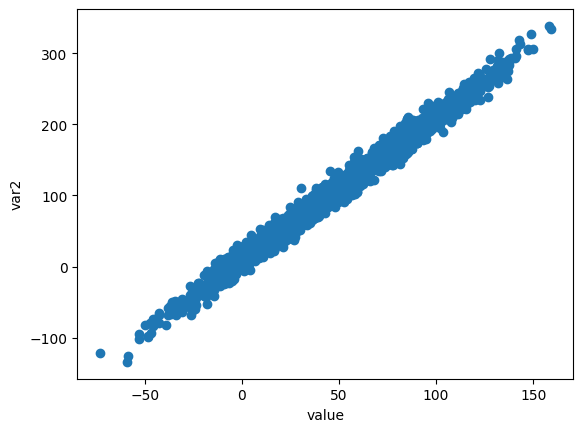

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8339 - accuracy: 0.8009 - loss: 0.4456 - precision: 0.8532
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8112 - accuracy: 0.7593 - loss: 0.4732 - precision: 0.8433
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8233 - accuracy: 0.7866 - loss: 0.4254 - precision: 0.8389
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8381 - accuracy: 0.7970 - loss: 0.4455 - precision: 0.8279
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8415 - accuracy: 0.7976 - loss: 0.4246 - precision: 0.8399
13/13 - 0s - 8ms/step - AUC: 0.8176 - accuracy: 0.7700 - loss: 0.4712 - precision: 0.8971


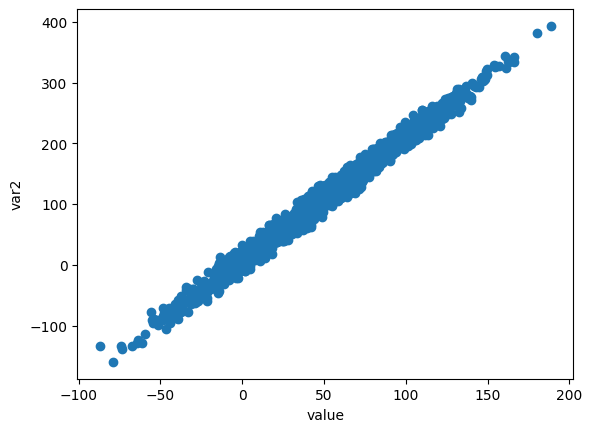

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.7509 - accuracy: 0.7118 - loss: 0.5471 - precision: 0.8055
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.7688 - accuracy: 0.7278 - loss: 0.5260 - precision: 0.8104
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7640 - accuracy: 0.7219 - loss: 0.5193 - precision: 0.8118
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7718 - accuracy: 0.7267 - loss: 0.5080 - precision: 0.7896
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7731 - accuracy: 0.7073 - loss: 0.5225 - precision: 0.7818
13/13 - 0s - 7ms/step - AUC: 0.7785 - accuracy: 0.7575 - loss: 0.5127 - precision: 0.7861


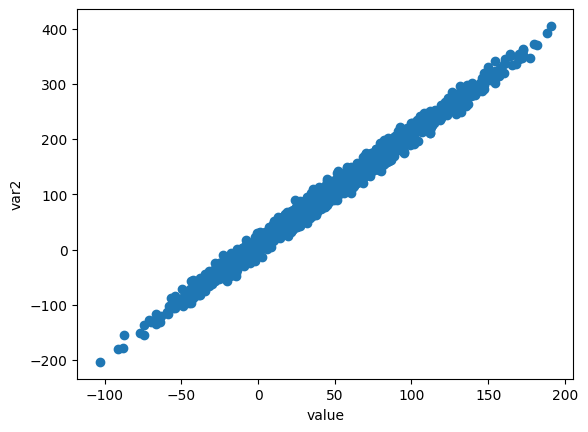

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7457 - accuracy: 0.7145 - loss: 0.5618 - precision: 0.7802
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7583 - accuracy: 0.7016 - loss: 0.5380 - precision: 0.7876
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7342 - accuracy: 0.6858 - loss: 0.5626 - precision: 0.7731
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7403 - accuracy: 0.6863 - loss: 0.5542 - precision: 0.7433
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7579 - accuracy: 0.7067 - loss: 0.5456 - precision: 0.7884
13/13 - 0s - 5ms/step - AUC: 0.7121 - accuracy: 0.6600 - loss: 0.5701 - precision: 0.8416


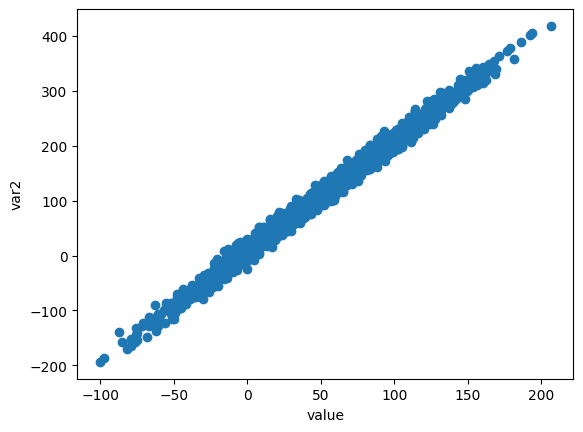

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7410 - accuracy: 0.6874 - loss: 0.5751 - precision: 0.8067
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7342 - accuracy: 0.6789 - loss: 0.5755 - precision: 0.7646
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7541 - accuracy: 0.7103 - loss: 0.5613 - precision: 0.7837
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7711 - accuracy: 0.7229 - loss: 0.5381 - precision: 0.8070
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7554 - accuracy: 0.6916 - loss: 0.5560 - precision: 0.7987
13/13 - 0s - 7ms/step - AUC: 0.7336 - accuracy: 0.6725 - loss: 0.5659 - precision: 0.7236


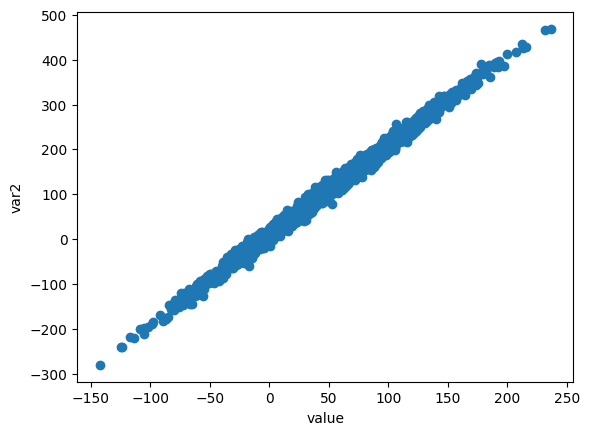

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7104 - accuracy: 0.6632 - loss: 0.5985 - precision: 0.7554
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7210 - accuracy: 0.6663 - loss: 0.5947 - precision: 0.7549
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7201 - accuracy: 0.6766 - loss: 0.5899 - precision: 0.7627
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6994 - accuracy: 0.6637 - loss: 0.5956 - precision: 0.7608
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7173 - accuracy: 0.6590 - loss: 0.5955 - precision: 0.8082
13/13 - 0s - 5ms/step - AUC: 0.7091 - accuracy: 0.6400 - loss: 0.6032 - precision: 0.7333


In [254]:
for i in sigma1:
    out = twovar_model(i, sigma2, True, 2)
    twovar_test.append(out)

In [257]:
twovar_test = pd.DataFrame(twovar_test)
twovar_test

,loss,accuracy,precision,AUC,sigma_var1,sigma_var2,corr
0,0.004243,1.0000,1.000000,1.000000,0,10,"(0.9811863592573895, 0.0)"
1,0.005045,0.9975,0.994975,1.000000,5,10,"(0.9807489468755586, 0.0)"
2,0.011925,1.0000,1.000000,1.000000,10,10,"(0.9833859181577294, 0.0)"
3,0.112768,0.9675,0.951691,0.976650,15,10,"(0.9858726191555811, 0.0)"
4,0.284130,0.8975,0.900497,0.934306,20,10,"(0.9877957543074829, 0.0)"
5,0.371211,0.8150,0.878613,0.863602,25,10,"(0.9905468559553795, 0.0)"
6,0.471244,0.7700,0.897059,0.817625,30,10,"(0.9921738286564317, 0.0)"
7,0.512723,0.7575,0.786127,0.778536,35,10,"(0.9931329350732425, 0.0)"
8,0.570140,0.6600,0.841584,0.712133,40,10,"(0.9948372512128125, 0.0)"
9,0.565911,0.6725,0.723577,0.733557,45,10,"(0.9951639544795473, 0.0)"


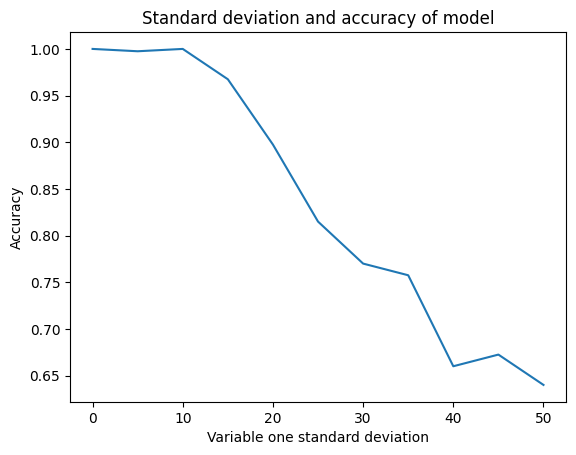

In [258]:
plt.plot(twovar_test.sigma_var1, twovar_test.accuracy)
plt.title("Standard deviation and accuracy of model")
plt.xlabel("Variable one standard deviation")
plt.ylabel("Accuracy")
plt.show()

In [259]:
test = []
for i in sigma1:
    out = twovar_model(i, sigma2, False, 10)
    test.append(out)

13/13 - 0s - 7ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 0.0054 - precision: 1.0000
13/13 - 0s - 6ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 0.0017 - precision: 1.0000
13/13 - 0s - 7ms/step - AUC: 0.9872 - accuracy: 0.9825 - loss: 0.0708 - precision: 0.9668
13/13 - 0s - 8ms/step - AUC: 0.9637 - accuracy: 0.9525 - loss: 0.1103 - precision: 0.9604
13/13 - 0s - 9ms/step - AUC: 0.8865 - accuracy: 0.8800 - loss: 0.2927 - precision: 0.9306
13/13 - 0s - 6ms/step - AUC: 0.8761 - accuracy: 0.8300 - loss: 0.3916 - precision: 0.8214
13/13 - 0s - 6ms/step - AUC: 0.8050 - accuracy: 0.7475 - loss: 0.4731 - precision: 0.8690
13/13 - 0s - 6ms/step - AUC: 0.7634 - accuracy: 0.7150 - loss: 0.4891 - precision: 0.8981
13/13 - 0s - 5ms/step - AUC: 0.7847 - accuracy: 0.7350 - loss: 0.4936 - precision: 0.8036
13/13 - 0s - 5ms/step - AUC: 0.7401 - accuracy: 0.6700 - loss: 0.5667 - precision: 0.7984
13/13 - 0s - 5ms/step - AUC: 0.7327 - accuracy: 0.6475 - loss: 0.5576 - precision: 0.8300


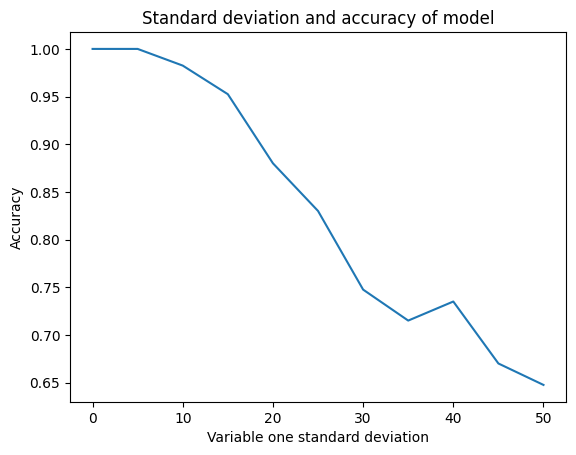

In [260]:
test = pd.DataFrame(test)
plt.plot(test.sigma_var1, test.accuracy)
plt.title("Standard deviation and accuracy of model")
plt.xlabel("Variable one standard deviation")
plt.ylabel("Accuracy")
plt.show()

In [261]:
test = []
for i in sigma1:
    out = twovar_model(i, sigma2, False, 5)
    test.append(out)

13/13 - 0s - 6ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 0.0014 - precision: 1.0000
13/13 - 0s - 5ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 4.5039e-04 - precision: 1.0000
13/13 - 0s - 6ms/step - AUC: 0.9760 - accuracy: 0.9725 - loss: 0.0876 - precision: 0.9458
13/13 - 0s - 5ms/step - AUC: 0.9373 - accuracy: 0.9200 - loss: 0.1639 - precision: 0.9613
13/13 - 0s - 6ms/step - AUC: 0.9400 - accuracy: 0.9175 - loss: 0.2339 - precision: 0.9341
13/13 - 0s - 6ms/step - AUC: 0.8102 - accuracy: 0.7825 - loss: 0.4316 - precision: 0.8439
13/13 - 0s - 5ms/step - AUC: 0.8677 - accuracy: 0.8250 - loss: 0.4003 - precision: 0.8718
13/13 - 0s - 8ms/step - AUC: 0.7487 - accuracy: 0.7150 - loss: 0.5260 - precision: 0.7671
13/13 - 0s - 6ms/step - AUC: 0.7450 - accuracy: 0.7125 - loss: 0.5506 - precision: 0.7688
13/13 - 0s - 5ms/step - AUC: 0.7112 - accuracy: 0.6375 - loss: 0.5816 - precision: 0.7810
13/13 - 0s - 5ms/step - AUC: 0.6701 - accuracy: 0.6475 - loss: 0.6131 - precision: 0.7333


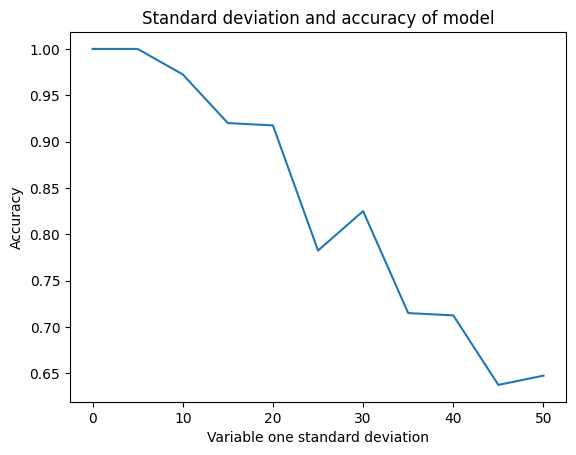

In [262]:
test = pd.DataFrame(test)
plt.plot(test.sigma_var1, test.accuracy)
plt.title("Standard deviation and accuracy of model")
plt.xlabel("Variable one standard deviation")
plt.ylabel("Accuracy")
plt.show()

Accuracy trends down as standard deviation increases, as expected. The correlation between the two variables stays very close to one. Notable: accuracy stays at/right near 1 as standard deviation increases from 0 to 10 in all trials done. In most trials, some irregularity in the downward trend exists, often with a local peak in accuracy somewhere in the 20-50 range. Three examples of this are shown above with random seeds set.

Repeat keeping variable one standard deviation constant at 10 and varying the noise added when variable two is generated from variable one.

In [263]:
sigma1 = 10
sigma2 = np.arange(0,105,5)
secondvar_test = []

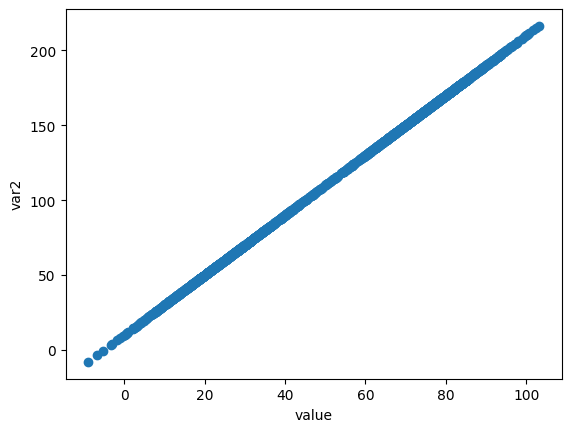

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9832 - accuracy: 0.9083 - loss: 0.3317 - precision: 0.9884
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9925 - accuracy: 0.9905 - loss: 0.0508 - precision: 0.9973
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9922 - accuracy: 0.9869 - loss: 0.0351 - precision: 0.9906
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9841 - accuracy: 0.9788 - loss: 0.0614 - precision: 0.9889
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9899 - accuracy: 0.9845 - loss: 0.0389 - precision: 0.9914
13/13 - 0s - 6ms/step - AUC: 0.9847 - accuracy: 0.9800 - loss: 0.0380 - precision: 1.0000


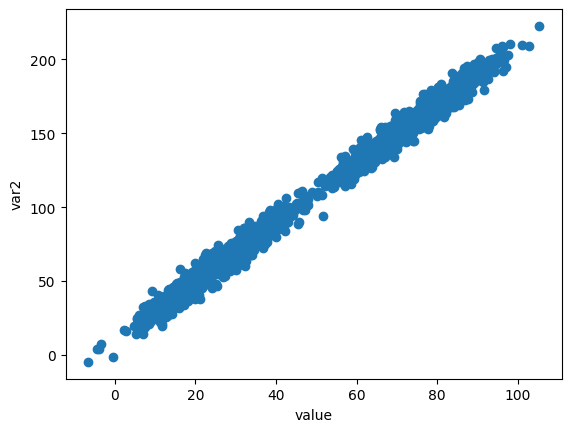

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9920 - accuracy: 0.9874 - loss: 0.0407 - precision: 0.9896
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9971 - accuracy: 0.9932 - loss: 0.0229 - precision: 0.9962
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9930 - accuracy: 0.9910 - loss: 0.0263 - precision: 0.9944
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9961 - accuracy: 0.9935 - loss: 0.0201 - precision: 0.9936
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9975 - accuracy: 0.9975 - loss: 0.0140 - precision: 0.9993
13/13 - 0s - 5ms/step - AUC: 0.9944 - accuracy: 0.9950 - loss: 0.0262 - precision: 0.9910


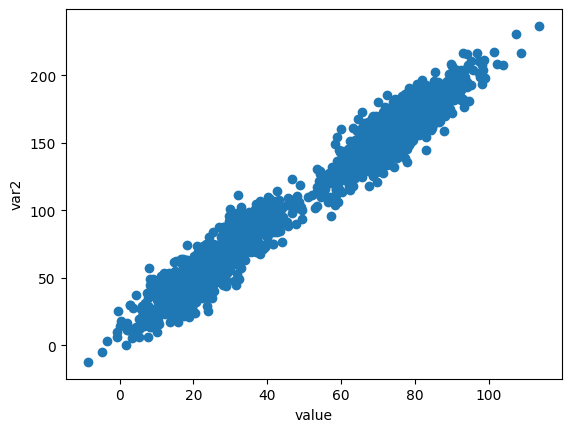

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9932 - accuracy: 0.9893 - loss: 0.0301 - precision: 0.9970
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9933 - accuracy: 0.9918 - loss: 0.0259 - precision: 0.9899
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9938 - accuracy: 0.9919 - loss: 0.0212 - precision: 0.9914
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9938 - accuracy: 0.9931 - loss: 0.0248 - precision: 0.9887
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9942 - accuracy: 0.9923 - loss: 0.0237 - precision: 0.9939 
13/13 - 0s - 6ms/step - AUC: 0.9897 - accuracy: 0.9825 - loss: 0.0431 - precision: 0.9895


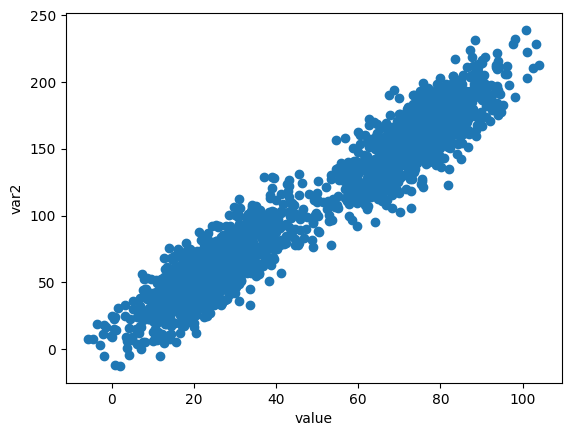

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9882 - accuracy: 0.9825 - loss: 0.0436 - precision: 0.9891
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9932 - accuracy: 0.9913 - loss: 0.0277 - precision: 0.9914
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9873 - accuracy: 0.9869 - loss: 0.0348 - precision: 0.9927
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9968 - accuracy: 0.9948 - loss: 0.0189 - precision: 0.9937
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9956 - accuracy: 0.9940 - loss: 0.0231 - precision: 0.9954
13/13 - 0s - 10ms/step - AUC: 0.9974 - accuracy: 0.9950 - loss: 0.0181 - precision: 0.9903


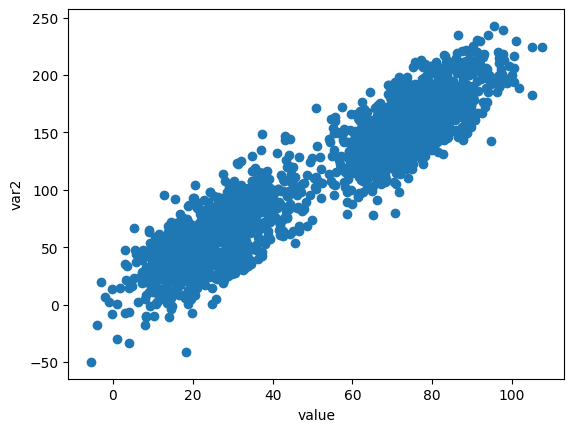

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9946 - accuracy: 0.9923 - loss: 0.0225 - precision: 0.9937
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9893 - accuracy: 0.9872 - loss: 0.0325 - precision: 0.9899
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9935 - accuracy: 0.9894 - loss: 0.0323 - precision: 0.9948
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9953 - accuracy: 0.9915 - loss: 0.0173 - precision: 0.9946
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9969 - accuracy: 0.9943 - loss: 0.0198 - precision: 0.9939 
13/13 - 0s - 5ms/step - AUC: 0.9926 - accuracy: 0.9925 - loss: 0.0257 - precision: 0.9897


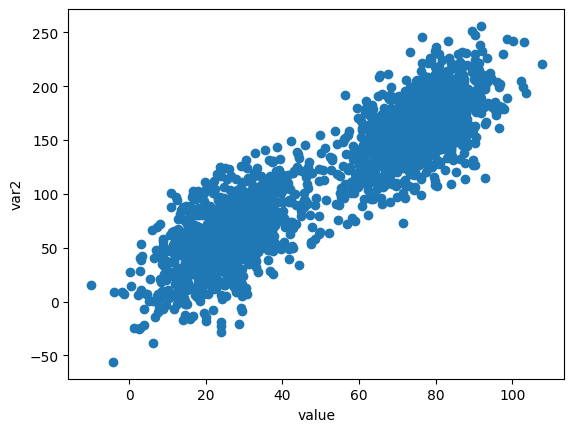

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9913 - accuracy: 0.9902 - loss: 0.0368 - precision: 0.9934
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9895 - accuracy: 0.9854 - loss: 0.0422 - precision: 0.9879
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9935 - accuracy: 0.9921 - loss: 0.0310 - precision: 0.9952
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9903 - accuracy: 0.9858 - loss: 0.0399 - precision: 0.9871
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9863 - accuracy: 0.9847 - loss: 0.0513 - precision: 0.9799
13/13 - 0s - 5ms/step - AUC: 0.9902 - accuracy: 0.9875 - loss: 0.0260 - precision: 0.9952


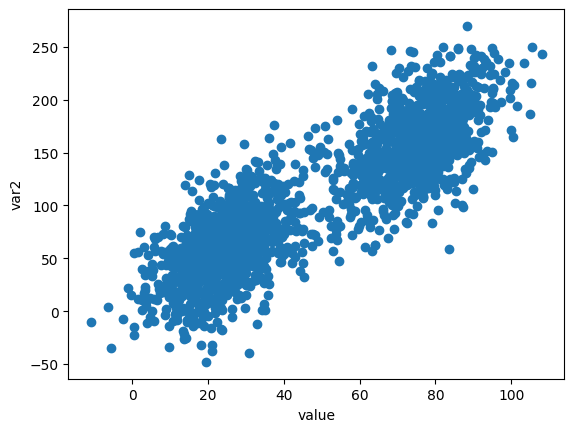

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9942 - accuracy: 0.9939 - loss: 0.0278 - precision: 0.9966
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9934 - accuracy: 0.9895 - loss: 0.0249 - precision: 0.9912
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9929 - accuracy: 0.9893 - loss: 0.0247 - precision: 0.9932
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9827 - accuracy: 0.9791 - loss: 0.0571 - precision: 0.9805
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9911 - accuracy: 0.9905 - loss: 0.0266 - precision: 0.9889
13/13 - 0s - 8ms/step - AUC: 0.9773 - accuracy: 0.9675 - loss: 0.0887 - precision: 0.9395


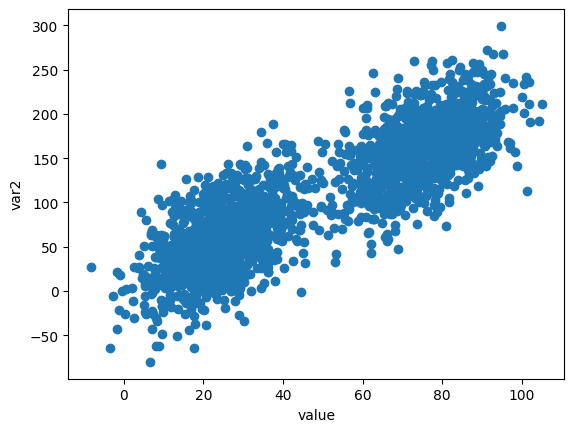

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9829 - accuracy: 0.9819 - loss: 0.0465 - precision: 0.9806
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9932 - accuracy: 0.9900 - loss: 0.0222 - precision: 0.9939
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9900 - accuracy: 0.9883 - loss: 0.0256 - precision: 0.9919
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9941 - accuracy: 0.9939 - loss: 0.0258 - precision: 0.9940
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9882 - accuracy: 0.9866 - loss: 0.0392 - precision: 0.9870
13/13 - 0s - 10ms/step - AUC: 0.9999 - accuracy: 0.9950 - loss: 0.0154 - precision: 0.9949


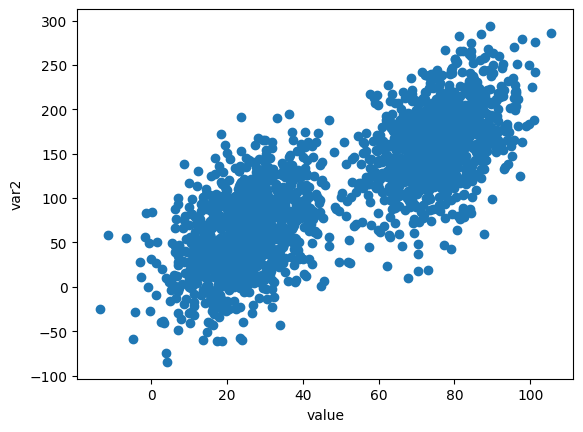

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9904 - accuracy: 0.9898 - loss: 0.0450 - precision: 0.9910
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9918 - accuracy: 0.9885 - loss: 0.0367 - precision: 0.9883
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9918 - accuracy: 0.9899 - loss: 0.0291 - precision: 0.9927
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9899 - accuracy: 0.9836 - loss: 0.0387 - precision: 0.9872
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9920 - accuracy: 0.9919 - loss: 0.0317 - precision: 0.9920
13/13 - 0s - 9ms/step - AUC: 0.9976 - accuracy: 0.9975 - loss: 0.0158 - precision: 0.9949


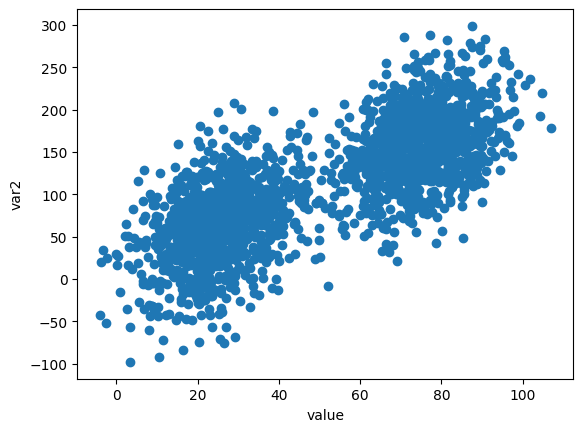

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9914 - accuracy: 0.9880 - loss: 0.0383 - precision: 0.9904
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9909 - accuracy: 0.9903 - loss: 0.0269 - precision: 0.9894
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9907 - accuracy: 0.9900 - loss: 0.0332 - precision: 0.9888
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9849 - accuracy: 0.9796 - loss: 0.0543 - precision: 0.9750
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9942 - accuracy: 0.9907 - loss: 0.0243 - precision: 0.9915
13/13 - 0s - 6ms/step - AUC: 0.9919 - accuracy: 0.9900 - loss: 0.0211 - precision: 1.0000


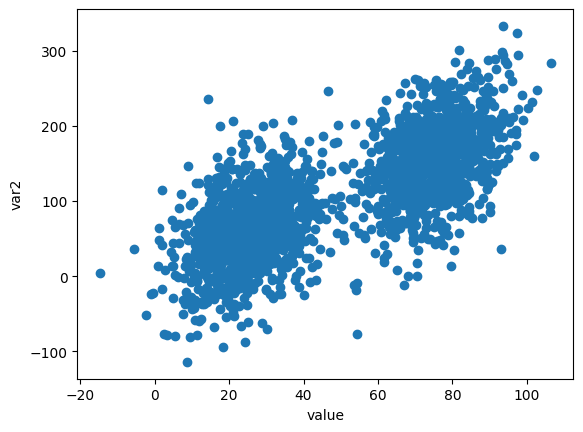

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9894 - accuracy: 0.9866 - loss: 0.0620 - precision: 0.9919
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9843 - accuracy: 0.9833 - loss: 0.0395 - precision: 0.9917
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9947 - accuracy: 0.9939 - loss: 0.0242 - precision: 0.9960
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9946 - accuracy: 0.9906 - loss: 0.0296 - precision: 0.9970
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9900 - accuracy: 0.9885 - loss: 0.0317 - precision: 0.9950
13/13 - 0s - 7ms/step - AUC: 0.9976 - accuracy: 0.9975 - loss: 0.0081 - precision: 1.0000


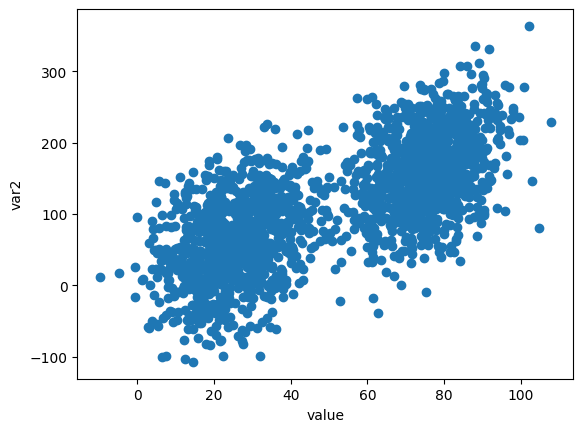

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9881 - accuracy: 0.9872 - loss: 0.0418 - precision: 0.9910
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9925 - accuracy: 0.9924 - loss: 0.0274 - precision: 0.9943
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9940 - accuracy: 0.9900 - loss: 0.0216 - precision: 0.9934
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9952 - accuracy: 0.9950 - loss: 0.0150 - precision: 0.9983
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9955 - accuracy: 0.9938 - loss: 0.0219 - precision: 0.9937
13/13 - 0s - 5ms/step - AUC: 0.9828 - accuracy: 0.9775 - loss: 0.0657 - precision: 0.9563


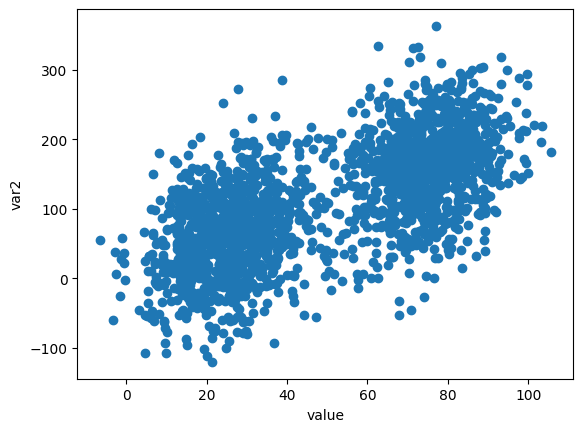

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9909 - accuracy: 0.9875 - loss: 0.0403 - precision: 0.9856
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9915 - accuracy: 0.9875 - loss: 0.0276 - precision: 0.9882
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9936 - accuracy: 0.9864 - loss: 0.0249 - precision: 0.9953
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9821 - accuracy: 0.9747 - loss: 0.0580 - precision: 0.9741
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9933 - accuracy: 0.9881 - loss: 0.0349 - precision: 0.9917
13/13 - 0s - 5ms/step - AUC: 0.9825 - accuracy: 0.9800 - loss: 0.0511 - precision: 0.9703


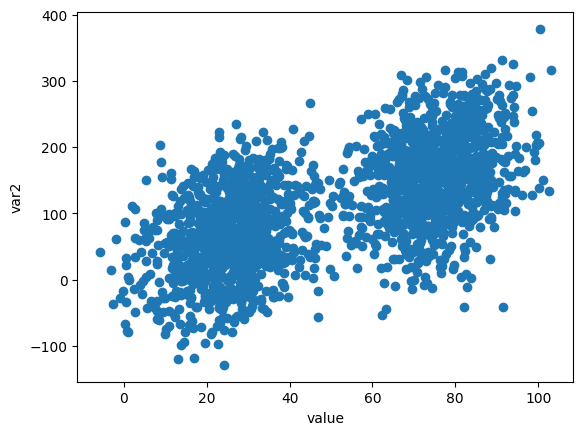

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9899 - accuracy: 0.9861 - loss: 0.0335 - precision: 0.9900
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9923 - accuracy: 0.9920 - loss: 0.0323 - precision: 0.9953
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9928 - accuracy: 0.9911 - loss: 0.0346 - precision: 0.9939
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9927 - accuracy: 0.9879 - loss: 0.0358 - precision: 0.9905
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9922 - accuracy: 0.9896 - loss: 0.0274 - precision: 0.9945
13/13 - 0s - 6ms/step - AUC: 0.9975 - accuracy: 0.9925 - loss: 0.0186 - precision: 0.9896


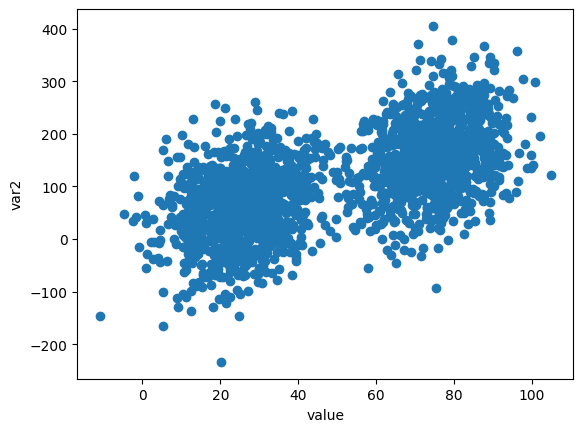

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9970 - accuracy: 0.9931 - loss: 0.0241 - precision: 0.9919
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9937 - accuracy: 0.9915 - loss: 0.0309 - precision: 0.9872
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9936 - accuracy: 0.9887 - loss: 0.0285 - precision: 0.9889
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9933 - accuracy: 0.9927 - loss: 0.0219 - precision: 0.9973
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9944 - accuracy: 0.9918 - loss: 0.0162 - precision: 0.9942
13/13 - 0s - 6ms/step - AUC: 0.9800 - accuracy: 0.9750 - loss: 0.0457 - precision: 1.0000


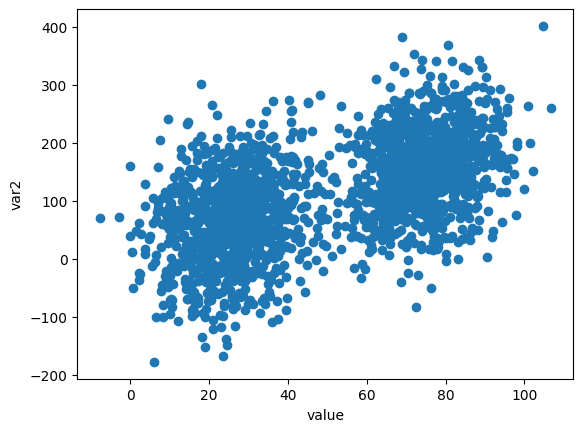

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9906 - accuracy: 0.9876 - loss: 0.0346 - precision: 0.9913
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9899 - accuracy: 0.9836 - loss: 0.0427 - precision: 0.9828
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9904 - accuracy: 0.9885 - loss: 0.0346 - precision: 0.9921
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9872 - accuracy: 0.9864 - loss: 0.0436 - precision: 0.9924
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9870 - accuracy: 0.9830 - loss: 0.0380 - precision: 0.9824
13/13 - 0s - 6ms/step - AUC: 0.9900 - accuracy: 0.9825 - loss: 0.0442 - precision: 0.9660


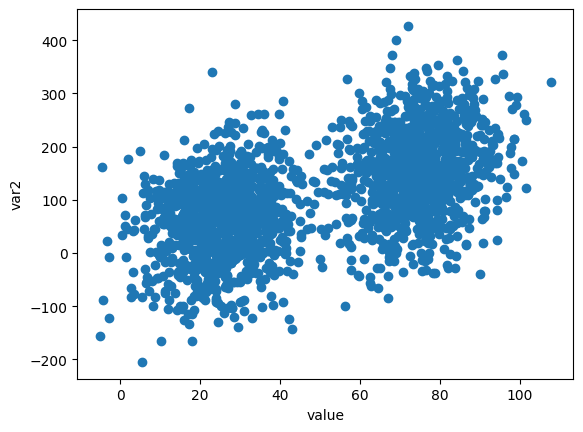

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9930 - accuracy: 0.9887 - loss: 0.0290 - precision: 0.9930
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9915 - accuracy: 0.9877 - loss: 0.0376 - precision: 0.9898
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9932 - accuracy: 0.9902 - loss: 0.0258 - precision: 0.9889
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9950 - accuracy: 0.9938 - loss: 0.0348 - precision: 0.9955 
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9884 - accuracy: 0.9861 - loss: 0.0375 - precision: 0.9891
13/13 - 0s - 7ms/step - AUC: 0.9926 - accuracy: 0.9875 - loss: 0.0181 - precision: 1.0000


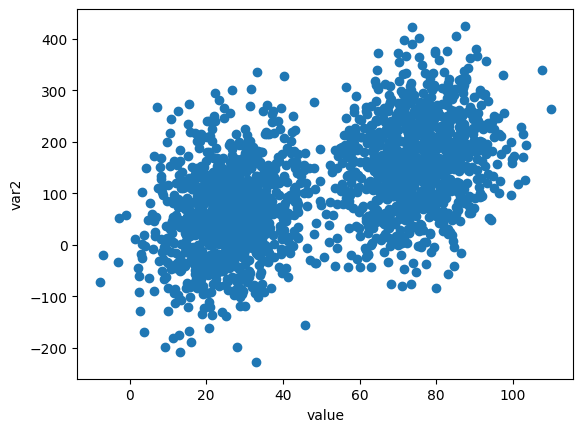

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9904 - accuracy: 0.9897 - loss: 0.0341 - precision: 0.9931
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9898 - accuracy: 0.9892 - loss: 0.0359 - precision: 0.9917
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9886 - accuracy: 0.9883 - loss: 0.0421 - precision: 0.9887
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9918 - accuracy: 0.9894 - loss: 0.0356 - precision: 0.9913
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9912 - accuracy: 0.9903 - loss: 0.0284 - precision: 0.9974
13/13 - 0s - 5ms/step - AUC: 0.9926 - accuracy: 0.9900 - loss: 0.0329 - precision: 1.0000


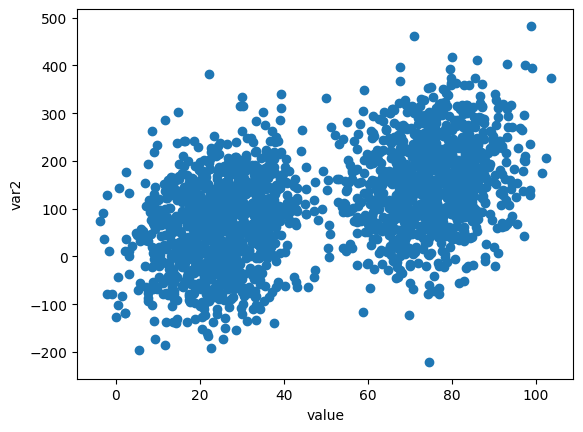

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9943 - accuracy: 0.9938 - loss: 0.0150 - precision: 0.9991
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9921 - accuracy: 0.9921 - loss: 0.0354 - precision: 0.9883
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9948 - accuracy: 0.9949 - loss: 0.0196 - precision: 0.9944
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9944 - accuracy: 0.9938 - loss: 0.0175 - precision: 0.9970  
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9956 - accuracy: 0.9896 - loss: 0.0234 - precision: 0.9860
13/13 - 0s - 6ms/step - AUC: 0.9925 - accuracy: 0.9925 - loss: 0.0232 - precision: 1.0000


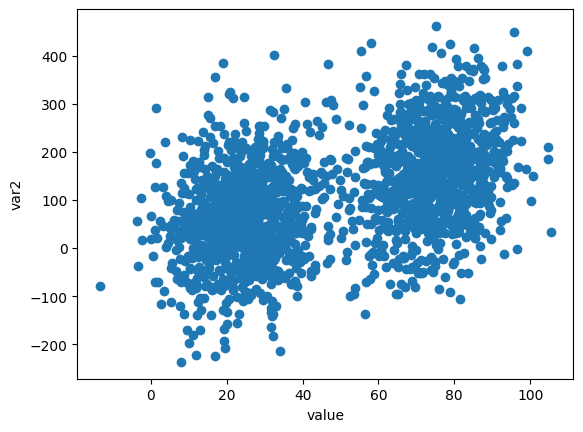

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9905 - accuracy: 0.9884 - loss: 0.0282 - precision: 0.9938
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9916 - accuracy: 0.9902 - loss: 0.0286 - precision: 0.9916
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9863 - accuracy: 0.9834 - loss: 0.0520 - precision: 0.9878
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9894 - accuracy: 0.9862 - loss: 0.0352 - precision: 0.9909
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9879 - accuracy: 0.9847 - loss: 0.0445 - precision: 0.9909
13/13 - 0s - 6ms/step - AUC: 0.9950 - accuracy: 0.9950 - loss: 0.0207 - precision: 1.0000


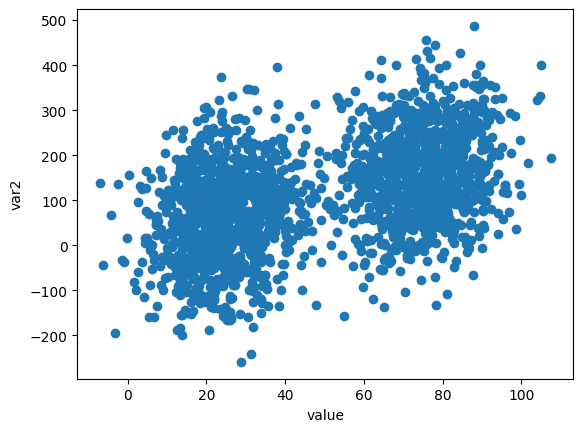

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9913 - accuracy: 0.9912 - loss: 0.0293 - precision: 0.9937
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9907 - accuracy: 0.9870 - loss: 0.0378 - precision: 0.9918
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9918 - accuracy: 0.9903 - loss: 0.0283 - precision: 0.9920
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9918 - accuracy: 0.9912 - loss: 0.0271 - precision: 0.9942
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9918 - accuracy: 0.9888 - loss: 0.0294 - precision: 0.9922
13/13 - 0s - 7ms/step - AUC: 0.9783 - accuracy: 0.9700 - loss: 0.0563 - precision: 0.9835


In [264]:
for i in sigma2:
    out = twovar_model(sigma1, i, True, 2)
    secondvar_test.append(out)

In [265]:
secondvar_test = pd.DataFrame(secondvar_test)
secondvar_test

,loss,accuracy,precision,AUC,sigma_var1,sigma_var2,corr
0,0.037996,0.9800,1.000000,0.984672,10,0,"(1.0, 0.0)"
1,0.026191,0.9950,0.990991,0.994419,10,5,"(0.9958235308191818, 0.0)"
2,0.043121,0.9825,0.989529,0.989666,10,10,"(0.9833657432289157, 0.0)"
3,0.018112,0.9950,0.990291,0.997374,10,15,"(0.9622632658008168, 0.0)"
4,0.025732,0.9925,0.989744,0.992568,10,20,"(0.9358107924315655, 0.0)"
5,0.025959,0.9875,0.995169,0.990213,10,25,"(0.8982673474156955, 0.0)"
6,0.088662,0.9675,0.939535,0.977273,10,30,"(0.8668329824756413, 0.0)"
7,0.015427,0.9950,0.994898,0.999950,10,35,"(0.8511582229960624, 0.0)"
8,0.015797,0.9975,0.994898,0.997561,10,40,"(0.8022741852730002, 0.0)"
9,0.021078,0.9900,1.000000,0.991892,10,45,"(0.762079779448151, 0.0)"


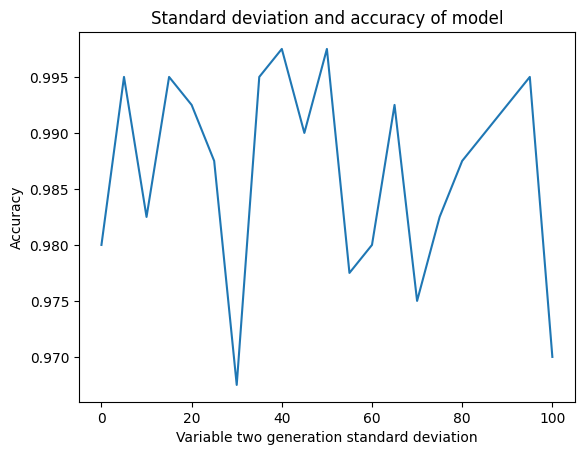

In [266]:
plt.plot(secondvar_test.sigma_var2, secondvar_test.accuracy)
plt.title("Standard deviation and accuracy of model")
plt.xlabel("Variable two generation standard deviation")
plt.ylabel("Accuracy")
plt.show()

In [270]:
#different seed
test = []
for i in sigma2:
    out = twovar_model(sigma1, i, False, 17)
    test.append(out)

13/13 - 0s - 5ms/step - AUC: 0.9926 - accuracy: 0.9900 - loss: 0.0293 - precision: 0.9953
13/13 - 0s - 5ms/step - AUC: 0.9952 - accuracy: 0.9900 - loss: 0.0236 - precision: 0.9952
13/13 - 0s - 5ms/step - AUC: 0.9943 - accuracy: 0.9900 - loss: 0.0184 - precision: 0.9866
13/13 - 0s - 5ms/step - AUC: 0.9974 - accuracy: 0.9925 - loss: 0.0089 - precision: 0.9949
13/13 - 0s - 5ms/step - AUC: 0.9948 - accuracy: 0.9925 - loss: 0.0160 - precision: 0.9948
13/13 - 0s - 8ms/step - AUC: 0.9737 - accuracy: 0.9700 - loss: 0.0795 - precision: 0.9409
13/13 - 0s - 6ms/step - AUC: 0.9893 - accuracy: 0.9875 - loss: 0.0363 - precision: 0.9822
13/13 - 0s - 6ms/step - AUC: 0.9885 - accuracy: 0.9850 - loss: 0.0537 - precision: 0.9731
13/13 - 0s - 5ms/step - AUC: 0.9949 - accuracy: 0.9925 - loss: 0.0171 - precision: 0.9856
13/13 - 0s - 5ms/step - AUC: 0.9950 - accuracy: 0.9950 - loss: 0.0122 - precision: 0.9948
13/13 - 0s - 5ms/step - AUC: 0.9899 - accuracy: 0.9875 - loss: 0.0230 - precision: 0.9851
13/13 - 0s

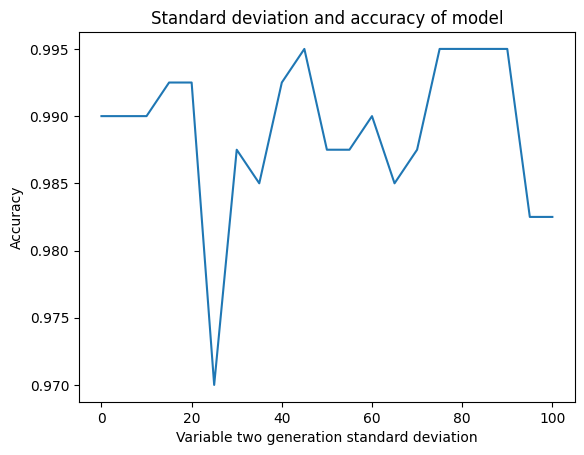

In [271]:
test = pd.DataFrame(test)
plt.plot(test.sigma_var2, test.accuracy)
plt.title("Standard deviation and accuracy of model")
plt.xlabel("Variable two generation standard deviation")
plt.ylabel("Accuracy")
plt.show()

There seems to not be a consisntent trend for the way that the noise added to the second variable affects the accuracy, and the accuracy stays very high consistently (above 0.9). The accuracy initially drops as the noise increases, but then increases and decreases erratically. This is likely demonstrating how the noise added cannot override the relationship between the two variables established when the second variable is based on the first variable's value. This can also be seen in the scatterplots of variable one vs variable two values. Once the noise has increased enough (past around a standard deviation of 35), there is little visual difference between the scatterplots as the noise continues to increase. However, the correlation by Pearson's test decreases as the noise increases, which is not reflected in the accuracy's lack of consisnstent trend and overall high value. This indicates that even when the correlation between two variables is low, a neural net can still (mostly) accuratly classify the data.

Adding more variables:

Variable 1 is random, variable 2 is dependent on 1 with noise added, variable 3 is dependent without noise added, and 4 is random and independent of the other variables.

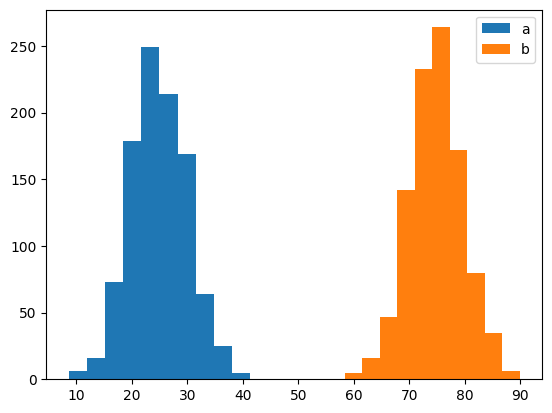

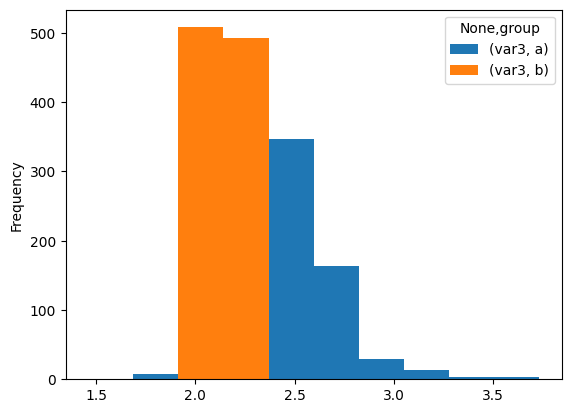

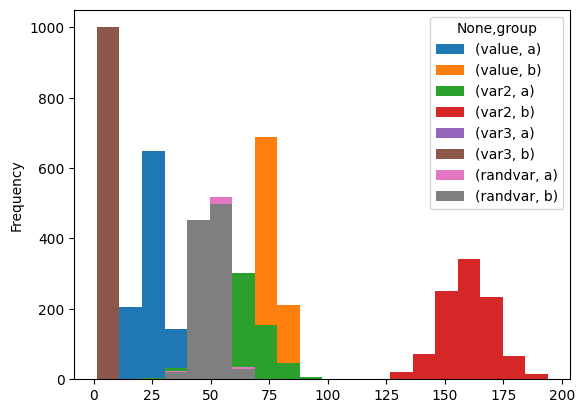

         value        var2      var3    randvar
152  25.515578   60.256806  2.361569  41.914862
48   22.321203   52.769718  2.364107  44.939882
333  29.758077   70.055778  2.354177  60.104441
383  25.755090   53.164109  2.064218  46.662831
203  31.942384   66.320926  2.076267  45.094693
..         ...         ...       ...        ...
327  69.837275  152.396298  2.182163  57.560665
400  77.436502  158.108240  2.041779  47.698624
170  20.120633   55.698007  2.768204  57.387675
755  81.942724  182.770283  2.230464  51.231435
445  32.551053   78.933682  2.424919  37.730370

[1600 rows x 4 columns]
152    0
48     0
333    0
383    0
203    0
      ..
327    1
400    1
170    0
755    1
445    0
Name: group, Length: 1600, dtype: int64
(1600, 4)
(1600,)


In [312]:
sigma1 = 5
mean_diff = 50
a = np.random.normal(25, sigma1, size = (1000, 1))

b = np.random.normal(25+mean_diff, sigma1, size = (1000, 1))
plt.hist(a)
plt.hist(b)
plt.legend(("a", "b"))

a_vec = np.repeat("a", len(a))
dset_a = np.column_stack((a_vec, a))
dset_a = pd.DataFrame(data = dset_a, columns =( "group", "value"))

b_vec = np.repeat("b", len(b))
dset_b = np.column_stack((b_vec, b))
dset_b = pd.DataFrame(dset_b , columns =( "group", "value"))

dset = pd.concat([dset_a, dset_b], axis = 0)
dset['value'] = pd.to_numeric(dset['value'])
dset

sigma2 = sigma1
noise = np.random.normal(0,sigma2,len(dset.group))
var2 = pd.Series(dset.value*2+10 + noise)
dset['var2'] = var2

sigma3 = 0
var3 = dset.var2/dset.value
dset['var3'] = var3

dset['randvar'] = np.random.normal(50, 5, len(dset.group))

dset.head

dset.pivot(columns = 'group', values = ['var3']).plot.hist()
plt.show()

dset.pivot(columns='group', values=['value', 'var2', 'var3', 'randvar']).plot.hist(bins = 20)
plt.show()

params = [sigma1, sigma2, sigma3, mean_diff, 4]

#make data into tensors
dset['group'] = dset['group'].replace(['a', 'b'], [0,1]).infer_objects(copy=False)

x = dset.drop('group', axis = 1)
y = dset['group']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


print(x_train)
print(y_train)
print(x_train.shape)
print(y_train.shape)

In [313]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
    optimizer = 'adam',
    metrics = ['accuracy', 'precision', 'AUC']
)

In [314]:
model.fit(x_train, y_train, epochs=5, batch_size = 32)

trial_manyvars_eval = model.evaluate(x_test,  y_test, verbose=2)
trial_manyvars_eval = trial_manyvars_eval + params
trial_manyvars_eval = pd.Series(trial_manyvars_eval, index = ['loss', 'accuracy', 'precision', 'AUC', 'sigma1', 'sigma2', 'sigma3', 'mean_diff', 'num_vars'])
print(trial_manyvars_eval)


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7449 - accuracy: 0.7431 - loss: 1.8863 - precision: 0.7137
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9934 - accuracy: 0.9932 - loss: 0.0204 - precision: 0.9915
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9977 - accuracy: 0.9939 - loss: 0.0135 - precision: 0.9906
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9987 - accuracy: 0.9968 - loss: 0.0061 - precision: 0.9944
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9985 - accuracy: 0.9974 - loss: 0.0056 - precision: 0.9995
13/13 - 1s - 44ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 7.1429e-05 - precision: 1.0000
loss          0.000071
accuracy      1.000000
precision     1.000000
AUC           1.000000
sigma1        5.000000
sigma2        5.000000
sigma3        0.000000
mean_diff    50.000000
num_vars      4.000000
dtype: float64


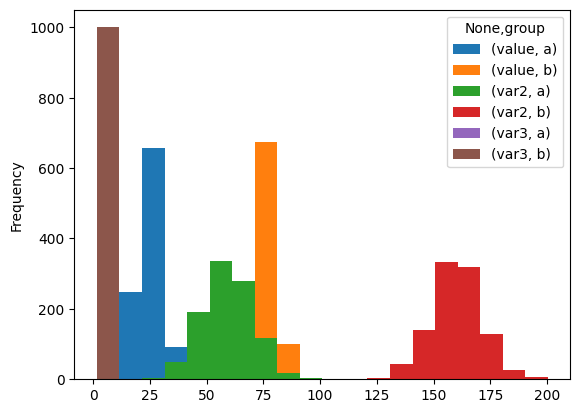

(1600, 3)
(1600,)


In [315]:
sigma1 = 5
mean_diff = 50
a = np.random.normal(25, sigma, size = (1000, 1))

b = np.random.normal(25+mean_diff, sigma1, size = (1000, 1))

a_vec = np.repeat("a", len(a))
dset_a = np.column_stack((a_vec, a))
dset_a = pd.DataFrame(data = dset_a, columns =( "group", "value"))

b_vec = np.repeat("b", len(b))
dset_b = np.column_stack((b_vec, b))
dset_b = pd.DataFrame(dset_b , columns =( "group", "value"))

dset = pd.concat([dset_a, dset_b], axis = 0)
dset['value'] = pd.to_numeric(dset['value'])
dset

sigma2 = sigma1
noise = np.random.normal(0,sigma2,len(dset.group))
var2 = pd.Series(dset.value*2+10 + noise)
dset['var2'] = var2

sigma3 = 0
var3 = dset.var2/dset.value
dset['var3'] = var3

dset.pivot(columns='group', values=['value', 'var2', 'var3']).plot.hist(bins = 20)
plt.show()

params = [sigma1, sigma2, sigma3, mean_diff, 3]

#make data into tensors
dset['group'] = dset['group'].replace(['a', 'b'], [0,1]).infer_objects(copy=False)

x = dset.drop('group', axis = 1)
y = dset['group']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)


In [316]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
    optimizer = 'adam',
    metrics = ['accuracy', 'precision', 'AUC']
)

model.fit(x_train, y_train, epochs=5)

trial_3vars_eval = model.evaluate(x_test,  y_test, verbose=2)
trial_3vars_eval = trial_3vars_eval + params
trial_3vars_eval = pd.Series(trial_3vars_eval, index = ['loss', 'accuracy', 'precision', 'AUC', 'sigma1', 'sigma2', 'sigma3', 'mean_diff', 'num_vars'])
print(trial_3vars_eval)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.5410 - accuracy: 0.5330 - loss: 2.2307 - precision: 0.5524
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8006 - accuracy: 0.7528 - loss: 0.6119 - precision: 0.7281
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9632 - accuracy: 0.9299 - loss: 0.2217 - precision: 0.9220
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9823 - accuracy: 0.9708 - loss: 0.1395 - precision: 0.9755
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9950 - accuracy: 0.9839 - loss: 0.0897 - precision: 0.9832
13/13 - 1s - 46ms/step - AUC: 0.9952 - accuracy: 0.9900 - loss: 0.0813 - precision: 0.9796
loss          0.081334
accuracy      0.990000
precision     0.979592
AUC           0.995192
sigma1        5.000000
sigma2        5.000000
sigma3        0.000000
mean_diff    50.000000
num_vars      3.000000
dtype: float64


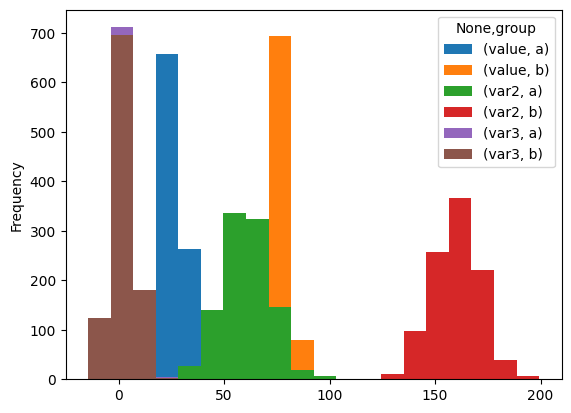

In [319]:
sigma1 = 5
mean_diff = 50
a = np.random.normal(25, sigma1, size = (1000, 1))

b = np.random.normal(25+mean_diff, sigma1, size = (1000, 1))

a_vec = np.repeat("a", len(a))
dset_a = np.column_stack((a_vec, a))
dset_a = pd.DataFrame(data = dset_a, columns =( "group", "value"))

b_vec = np.repeat("b", len(b))
dset_b = np.column_stack((b_vec, b))
dset_b = pd.DataFrame(dset_b , columns =( "group", "value"))

dset = pd.concat([dset_a, dset_b], axis = 0)
dset['value'] = pd.to_numeric(dset['value'])
dset

sigma2 = sigma2
noise = np.random.normal(0,sigma2,len(dset.group))
var2 = pd.Series(dset.value*2+10 + noise)
dset['var2'] = var2

sigma3 = sigma2
var3 = dset.var2/dset.value + noise
dset['var3'] = var3

dset.pivot(columns='group', values=['value', 'var2', 'var3']).plot.hist(bins = 20)
plt.show()

params = [sigma1, sigma2, sigma3, mean_diff, 3]

#make data into tensors
dset['group'] = dset['group'].replace(['a', 'b'], [0,1]).infer_objects(copy=False)

x = dset.drop('group', axis = 1)
y = dset['group']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [320]:
model.fit(x_train, y_train, epochs=5)

trial_3varsnoise_eval = model.evaluate(x_test,  y_test, verbose=2)
trial_3varsnoise_eval = trial_3varsnoise_eval + params
trial_3varsnoise_eval = pd.Series(trial_3varsnoise_eval, index = ['loss', 'accuracy', 'precision', 'AUC', 'sigma1', 'sigma2', 'sigma3', 'mean_diff', 'num_vars'])
print(trial_3varsnoise_eval)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9945 - accuracy: 0.9888 - loss: 0.0710 - precision: 0.9931
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9987 - accuracy: 0.9986 - loss: 0.0320 - precision: 0.9996
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9999 - accuracy: 0.9993 - loss: 0.0209 - precision: 0.9997
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 0.0142 - precision: 1.0000
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 0.0098 - precision: 1.0000
13/13 - 0s - 5ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 0.0092 - precision: 1.0000
loss          0.009155
accuracy      1.000000
precision     1.000000
AUC           1.000000
sigma1        5.000000
sigma2        5.000000
sigma3        5.000000
mean_diff    50.000000
num_vars      3.000000
dtype: float64


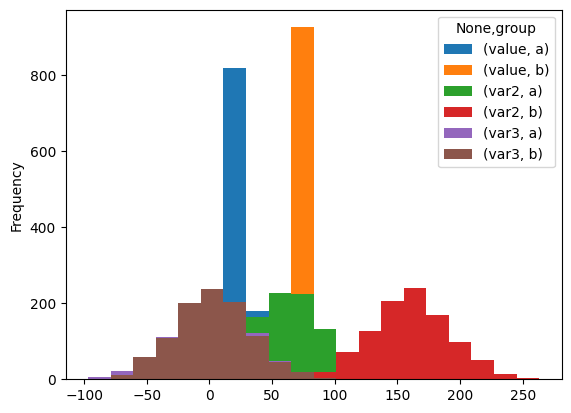

In [324]:
sigma1 = 5
mean_diff = 50
a = np.random.normal(25, sigma1, size = (1000, 1))

b = np.random.normal(25+mean_diff, sigma1, size = (1000, 1))

a_vec = np.repeat("a", len(a))
dset_a = np.column_stack((a_vec, a))
dset_a = pd.DataFrame(data = dset_a, columns =( "group", "value"))

b_vec = np.repeat("b", len(b))
dset_b = np.column_stack((b_vec, b))
dset_b = pd.DataFrame(dset_b , columns =( "group", "value"))

dset = pd.concat([dset_a, dset_b], axis = 0)
dset['value'] = pd.to_numeric(dset['value'])
dset

sigma2 = 30
noise = np.random.normal(0,sigma2,len(dset.group))
var2 = pd.Series(dset.value*2+10 + noise)
dset['var2'] = var2

sigma3 = sigma2
var3 = dset.var2/dset.value + noise
dset['var3'] = var3

dset.pivot(columns='group', values=['value', 'var2', 'var3']).plot.hist(bins = 20)
plt.show()

params = [sigma1, sigma2, sigma3, mean_diff, 3]

#make data into tensors
dset['group'] = dset['group'].replace(['a', 'b'], [0,1]).infer_objects(copy = False)

x = dset.drop('group', axis = 1)
y = dset['group']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [325]:
model.fit(x_train, y_train, epochs=5)

trial_30noise_eval = model.evaluate(x_test,  y_test, verbose=2)
trial_30noise_eval = trial_30noise_eval + params
trial_30noise_eval = pd.Series(trial_30noise_eval, index = ['loss', 'accuracy', 'precision', 'AUC', 'sigma1', 'sigma2', 'sigma3', 'mean_diff', 'num_vars'])
print(trial_30noise_eval)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9983 - accuracy: 0.9972 - loss: 0.0362 - precision: 0.9977
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9991 - accuracy: 0.9989 - loss: 0.0274 - precision: 1.0000
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9996 - accuracy: 0.9968 - loss: 0.0166 - precision: 0.9974
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 0.0160 - precision: 0.9999
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9994 - accuracy: 0.9991 - loss: 0.0148 - precision: 1.0000
13/13 - 0s - 6ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 0.0087 - precision: 1.0000
loss          0.008699
accuracy      1.000000
precision     1.000000
AUC           1.000000
sigma1        5.000000
sigma2       30.000000
sigma3       30.000000
mean_diff    50.000000
num_vars      3.000000
dtype: float64


With a standard deviation of 30, the single variable model would have a much lower accuracy. (Note that the mean difference here is 50 rather than 25). 
In the histogram it is visible that the distributions of variable 3 fully overlap with each other. However, varible 1 and 2 do not overlap very much so it is likely that the difference in those variables is allowing the high accuracy.

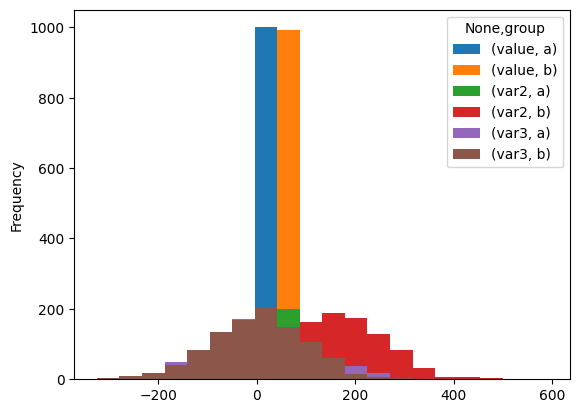

In [328]:
sigma1 = 5
mean_diff = 50
params = [sigma1, mean_diff]
a = np.random.normal(25, sigma1, size = (1000, 1))

b = np.random.normal(25+mean_diff, sigma1, size = (1000, 1))

a_vec = np.repeat("a", len(a))
dset_a = np.column_stack((a_vec, a))
dset_a = pd.DataFrame(data = dset_a, columns =( "group", "value"))

b_vec = np.repeat("b", len(b))
dset_b = np.column_stack((b_vec, b))
dset_b = pd.DataFrame(dset_b , columns =( "group", "value"))

dset = pd.concat([dset_a, dset_b], axis = 0)
dset['value'] = pd.to_numeric(dset['value'])
dset

sigma2 = 100
noise = np.random.normal(0,100,len(dset.group))
var2 = pd.Series(dset.value*2+10 + noise)
dset['var2'] = var2

sigma3 = sigma2
var3 = dset.var2/dset.value + noise
dset['var3'] = var3

dset.pivot(columns='group', values=['value', 'var2', 'var3']).plot.hist(bins = 20)
plt.show()

params = [sigma1, sigma2, sigma3, mean_diff, 3]

#make data into tensors
dset['group'] = dset['group'].replace(['a', 'b'], [0,1]).infer_objects(copy = False)

x = dset.drop('group', axis = 1)
y = dset['group']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [329]:
model.fit(x_train, y_train, epochs=5)

trial_100noise_eval = model.evaluate(x_test,  y_test, verbose=2)
trial_100noise_eval = trial_100noise_eval + params
trial_100noise_eval = pd.Series(trial_100noise_eval, index = ['loss', 'accuracy', 'precision', 'AUC', 'sigma1', 'sigma2', 'sigma3', 'mean_diff', 'num_vars'])
print(trial_100noise_eval)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9907 - accuracy: 0.9888 - loss: 0.0461 - precision: 0.9896
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9972 - accuracy: 0.9956 - loss: 0.0343 - precision: 0.9950
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9834 - accuracy: 0.9746 - loss: 0.0979 - precision: 0.9751
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9943 - accuracy: 0.9945 - loss: 0.0214 - precision: 0.9988
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9910 - accuracy: 0.9885 - loss: 0.0514 - precision: 0.9895
13/13 - 0s - 5ms/step - AUC: 0.9975 - accuracy: 0.9975 - loss: 0.0224 - precision: 1.0000
loss           0.022401
accuracy       0.997500
precision      1.000000
AUC            0.997487
sigma1         5.000000
sigma2       100.000000
sigma3       100.000000
mean_diff     50.000000
num_vars       3.000000
dtype: float64


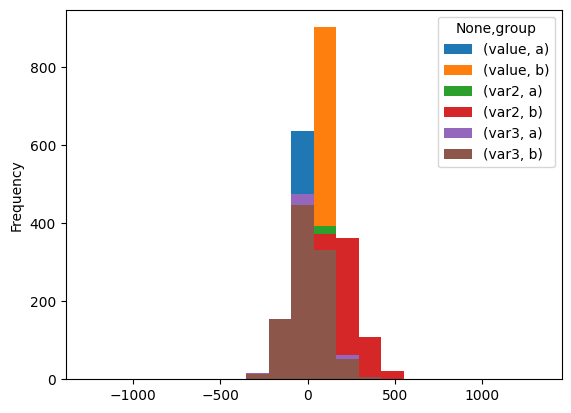

In [330]:
sigma1 = 30
mean_diff = 50
a = np.random.normal(25, sigma1, size = (1000, 1))

b = np.random.normal(25+mean_diff, sigma1, size = (1000, 1))

a_vec = np.repeat("a", len(a))
dset_a = np.column_stack((a_vec, a))
dset_a = pd.DataFrame(data = dset_a, columns =( "group", "value"))

b_vec = np.repeat("b", len(b))
dset_b = np.column_stack((b_vec, b))
dset_b = pd.DataFrame(dset_b , columns =( "group", "value"))

dset = pd.concat([dset_a, dset_b], axis = 0)
dset['value'] = pd.to_numeric(dset['value'])
dset

sigma2 = 100
noise = np.random.normal(0,sigma2,len(dset.group))
var2 = pd.Series(dset.value*2+10 + noise)
dset['var2'] = var2

sigma3 = sigma2
var3 = dset.var2/dset.value + noise
dset['var3'] = var3

dset.pivot(columns='group', values=['value', 'var2', 'var3']).plot.hist(bins = 20)
plt.show()

params = [sigma1, sigma2, sigma3, mean_diff, 3]

#make data into tensors
dset['group'] = dset['group'].replace(['a', 'b'], [0,1]).infer_objects(copy = False)

x = dset.drop('group', axis = 1)
y = dset['group']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [331]:
model.fit(x_train, y_train, epochs=5)

trial_100noise2_eval = model.evaluate(x_test,  y_test, verbose=2)
trial_100noise2_eval = trial_100noise2_eval + params
trial_100noise2_eval = pd.Series(trial_100noise2_eval, index = ['loss', 'accuracy', 'precision', 'AUC', 'sigma1', 'sigma2', 'sigma3', 'mean_diff', 'num_vars'])
print(trial_100noise2_eval)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.7725 - accuracy: 0.7460 - loss: 0.8741 - precision: 0.7902
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8144 - accuracy: 0.7748 - loss: 0.4760 - precision: 0.8308
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8130 - accuracy: 0.7651 - loss: 0.4724 - precision: 0.8071
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8331 - accuracy: 0.7800 - loss: 0.4564 - precision: 0.8224
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8167 - accuracy: 0.7649 - loss: 0.4700 - precision: 0.8313
13/13 - 0s - 5ms/step - AUC: 0.8243 - accuracy: 0.7750 - loss: 0.4714 - precision: 0.8294
loss           0.471410
accuracy       0.775000
precision      0.829412
AUC            0.824295
sigma1        30.000000
sigma2       100.000000
sigma3       100.000000
mean_diff     50.000000
num_vars       3.000000
dtype: float64


In [332]:
variables_test = pd.DataFrame([trial_3vars_eval, trial_3varsnoise_eval, trial_30noise_eval, trial_100noise_eval, trial_100noise2_eval])
variables_test

,loss,accuracy,precision,AUC,sigma1,sigma2,sigma3,mean_diff,num_vars
0,0.081334,0.9900,0.979592,0.995192,5.0,5.0,0.0,50.0,3.0
1,0.009155,1.0000,1.000000,1.000000,5.0,5.0,5.0,50.0,3.0
2,0.008699,1.0000,1.000000,1.000000,5.0,30.0,30.0,50.0,3.0
3,0.022401,0.9975,1.000000,0.997487,5.0,100.0,100.0,50.0,3.0
4,0.471410,0.7750,0.829412,0.824295,30.0,100.0,100.0,50.0,3.0


These trials are less systematic than the previous sections, as it would require much more time and space to investigate all of the possible interactions of the number of variables and their distributions with the accuracy of the classification model. However, some interesting points from these trials are:
1. It appears that if at least one variable has a clear separation between groups (i.e. small standard deviation/high mean difference), the model is able to accurately classify the data even if other variables have high levels of noise and distribution overlap. This can be seen in trials 2 and 3 especially.
2. A complete lack of added noise in a variable dependent on others caused slightly lower accuraccy, precision, and AUC, which may be due to the model being overfitted to the training data. (Comparison of trials 0 and 1).
3. If all variables have higher standard deviations, the accuracy decreases, in contrast to datasets where one variable retains a clear separation between groups. (Primarily visible in trials 3 and 4).